# PROCIda - Peer Review OpenCitations Index - Data Analysis

# 1. RQ 1 and RQ2
**RQ1**: Is that possible to create a new index of citations which contains typed citations where a peer review (citing entity) reviews (specific citation function) a publication (cited entity)?

**RQ2** What is the necessary transformation of the Crossref dump necessary to create such an index to be compliant with the OpenCitations Data Model?

1. Extract the total number of Citations, Peer Reviews and Cited Entities in our final Table in combined_file_normalized.csv.

In [11]:
import pandas as pd

# Load the CSV file
file_path = 'combined_file_normalized.csv'
df = pd.read_csv(file_path)
df_cleaned = pd.read_csv(file_path).drop_duplicates()

# Calculate the number of unique elements in each specified column
unique_counts = {
    'citations created': df_cleaned['oci'].nunique(),
    'peer reviews': df_cleaned['citing_doi'].nunique(),
    'reviewed entities': df_cleaned['cited_doi'].nunique()
}

# Create a new DataFrame with the results
unique_counts_df = pd.DataFrame(list(unique_counts.items()), columns=['entity', 'count'])

# Find all oci values that appear more than once
duplicated_ocis = df[df.duplicated(subset='oci', keep=False)]

# Save the duplicated_ocis DataFrame to a new CSV file
df_cleaned.to_csv('non_duplicated_ocis.csv', index=False)

# Display the results DataFrame
unique_counts_df



,entity,count
0,citations created,361117
1,peer reviews,348463
2,reviewed entities,77660


In [12]:
df_cleaned

,oci,citing_doi,cited_doi,citing_date,citing_url,cited_url,cited_issn,cited_venue,cited_date,prov_agent,source,prov_date,time_span
0,oci:020070505043614211815143702090604083700010...,10.7554/elife.29648.014,10.7554/elife.29648,2017-10-20,http://dx.doi.org/10.7554/elife.29648.014,http://dx.doi.org/10.7554/elife.29648,2050-084X,eLife,2017-09-11,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P1M9D
1,oci:020070505043614211815143702090604083700010...,10.7554/elife.29648.015,10.7554/elife.29648,2017-10-20,http://dx.doi.org/10.7554/elife.29648.015,http://dx.doi.org/10.7554/elife.29648,2050-084X,eLife,2017-09-11,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P1M9D
2,oci:020070505043614211815143702020509093700030...,10.7554/elife.22599.030,10.7554/elife.22599,2017-10-30,http://dx.doi.org/10.7554/elife.22599.030,http://dx.doi.org/10.7554/elife.22599,2050-084X,eLife,2017-09-11,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P1M19D
3,oci:020070505043614211815143702020509093700030...,10.7554/elife.22599.031,10.7554/elife.22599,2017-10-30,http://dx.doi.org/10.7554/elife.22599.031,http://dx.doi.org/10.7554/elife.22599,2050-084X,eLife,2017-09-11,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P1M19D
4,oci:020070505043614211815143702060905023700020...,10.7554/elife.26952.025,10.7554/elife.26952,2017-09-26,http://dx.doi.org/10.7554/elife.26952.025,http://dx.doi.org/10.7554/elife.26952,2050-084X,eLife,2017-09-11,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P15D
...,...,...,...,...,...,...,...,...,...,...,...,...,...
416527,oci:020050109043628146302000201630105036327120...,10.5194/se-2021-153-rc2,10.5194/se-13-1027-2022,2022-03-10,http://dx.doi.org/10.5194/se-2021-153-rc2,http://dx.doi.org/10.5194/se-13-1027-2022,1869-9529,Solid Earth,2022-06-22,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,-P3M12D
416528,oci:020050109043628146302000201630105036327120...,10.5194/se-2021-153-rc1,10.5194/se-13-1027-2022,2022-03-01,http://dx.doi.org/10.5194/se-2021-153-rc1,http://dx.doi.org/10.5194/se-13-1027-2022,1869-9529,Solid Earth,2022-06-22,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,-P3M21D
416529,oci:020070505043614211815143707040501093728100...,10.7554/elife.74519.sa2,10.7554/elife.74519,2022-06-22,http://dx.doi.org/10.7554/elife.74519.sa2,http://dx.doi.org/10.7554/elife.74519,2050-084X,eLife,2022-06-22,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P0D
416530,oci:020070505043614211815143707040501093728100...,10.7554/elife.74519.sa1,10.7554/elife.74519,2022-06-22,http://dx.doi.org/10.7554/elife.74519.sa1,http://dx.doi.org/10.7554/elife.74519,2050-084X,eLife,2022-06-22,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P0D


2. Calculate ratio

In [13]:
# Calculate the ratio of citing_doi over cited_doi
citing_doi_count = unique_counts_df.loc[unique_counts_df['entity'] == 'peer reviews', 'count'].values[0]
cited_doi_count = unique_counts_df.loc[unique_counts_df['entity'] == 'reviewed entities', 'count'].values[0]

ratio = citing_doi_count / cited_doi_count

# Print the result
print(f'Ratio of unique citing_doi to cited_doi: {ratio:.2f}')


Ratio of unique citing_doi to cited_doi: 4.49


the final ration is 4.49 reviews to all documents.

3. Plot distribution

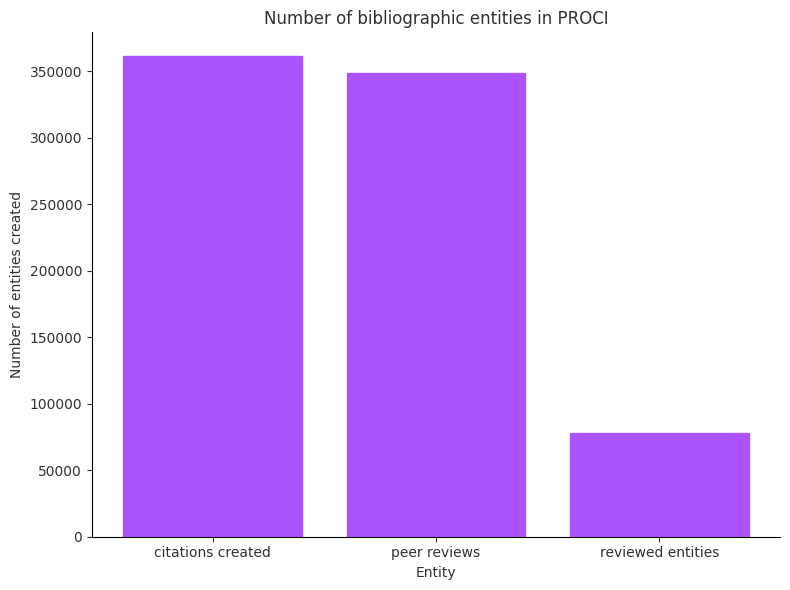

In [14]:
import matplotlib.pyplot as plt

# Extracting data from results_df
entities = unique_counts_df['entity']
counts = unique_counts_df['count']

# Creating the bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(entities, counts, color='#AC54FB')

# Removing right and top borders
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# Changing color of axes
plt.gca().tick_params(axis='x', colors='#352f36')
plt.gca().tick_params(axis='y', colors='#352f36')

# Changing color of labels and title
plt.xlabel('Entity', color='#352f36')
plt.ylabel('Number of entities created', color='#352f36')
plt.title('Number of bibliographic entities in PROCI', color='#352f36')

# Changing color of bar plot
for bar in bars:
    bar.set_color('#AC54FB')

# Rotating x-axis labels
plt.xticks( color='#352f36')
plt.yticks(color='#352f36')  # Setting color for y-axis ticks

# Displaying the plot
plt.tight_layout()
plt.show()


4. unique vales of cited entities that only appear once

In [15]:
import pandas as pd

# Count the occurrences of each cited_doi
cited_doi_counts = df_cleaned['cited_doi'].value_counts()

# Find the cited_doi values that appear only once
unique_cited_doi = cited_doi_counts[cited_doi_counts == 1]

# Display the unique cited_doi values
print("Unique cited_doi values that appear only once:")
unique_cited_doi
print(len(unique_cited_doi))



Unique cited_doi values that appear only once:
3944


5. Top 10 cited_doi

In [16]:
import pandas as pd

# Load the CSV file
file_path = 'combined_file_normalized.csv'
df = pd.read_csv(file_path)

df_cleaned = df.drop_duplicates()

# Count the occurrences of each cited_doi
cited_doi_counts = df_cleaned['cited_doi'].value_counts()

# Select the top ten cited_doi values
top_ten_cited_doi = cited_doi_counts.head(10)

# Create a DataFrame for the top ten cited_doi values
top_ten_table = pd.DataFrame({'bibliographic entities': top_ten_cited_doi.index, 'count': top_ten_cited_doi.values})

# Display the table
print ("Top one: Fractional-order nonlinear PID controller based maximum power extraction method for a direct-driven wind energy system")
print("Top ten cited_doi and their count:")
top_ten_table

Top one: Fractional-order nonlinear PID controller based maximum power extraction method for a direct-driven wind energy system
Top ten cited_doi and their count:


,bibliographic entities,count
0,10.32388/6wopal.2,48
1,10.32388/xmjxce,44
2,10.5194/se-2015-134,40
3,10.32388/odcenj,38
4,10.1002/vms3.1119,37
5,10.32388/7lebd5,36
6,10.32388/66uhui,35
7,10.32388/xchu6m,34
8,10.1002/vms3.475,34
9,10.32388/elvm4l,33


In [17]:
import pandas as pd

# Read the CSV files
meta_article_df = pd.read_csv("upload/meta_article_cleaned.csv")

# Count unique values in the "citing_doi" column
citing_doi_count = df_cleaned["cited_doi"].nunique()

# Count unique values in the "DOI" column
doi_count = meta_article_df["DOI"].nunique()

# Calculate missing_doi as the total count minus the DOI count
missing_doi_count = citing_doi_count - doi_count

# Ensure there are no negative values for missing_doi_count
if missing_doi_count < 0:
    missing_doi_count = 0

# Calculate the percentage of DOI and missing_doi
percentage_of_doi = (doi_count / citing_doi_count) * 100
percentage_of_missing_doi = (missing_doi_count / citing_doi_count) * 100

# Create a DataFrame with the counts and the percentages
counts_df_article = pd.DataFrame({
    "Category": ["DOI in Crossref", "DOI in Meta", "DOI not in Meta"],
    "Unique Count": [citing_doi_count, doi_count, missing_doi_count],
    "Percentage": [100, percentage_of_doi, percentage_of_missing_doi]
})

# Display the DataFrame
counts_df_article



,Category,Unique Count,Percentage
0,DOI in Crossref,77660,100.000000
1,DOI in Meta,70260,90.471285
2,DOI not in Meta,7400,9.528715


In [18]:
# Count the occurrences of each cited_doi
cited_doi_counts = df_cleaned['cited_doi'].value_counts()

# Select the top ten cited_doi values
top_ten_cited_doi = cited_doi_counts.head(10)

top_ten_cited_doi

cited_doi
10.32388/6wopal.2      48
10.32388/xmjxce        44
10.5194/se-2015-134    40
10.32388/odcenj        38
10.1002/vms3.1119      37
10.32388/7lebd5        36
10.32388/66uhui        35
10.32388/xchu6m        34
10.1002/vms3.475       34
10.32388/elvm4l        33
Name: count, dtype: int64

6. cited with more than 10: calculate the percentage and the number

In [19]:
import pandas as pd

# Assuming df_cleaned is already defined and contains the data

# Count the occurrences of each cited_doi
cited_doi_counts = df_cleaned['cited_doi'].value_counts()

# Count the number of cited_doi values that appear 4 times or fewer
more_than_4_count = (cited_doi_counts >= 4).sum()

# Calculate the total number of unique cited_doi
total_unique_dois = cited_doi_counts.size

# Calculate the percentage
percentage_more_than_4 = (more_than_4_count / total_unique_dois) * 100

# Display the percentage
print("Percentage of cited_doi that appear 4 times or fewer:", percentage_more_than_4)


# Print the number of cited_doi values that appear more than 10 times
print(f"Number of cited_doi values that appear more than 4 times: {more_than_4_count}")


Percentage of cited_doi that appear 4 times or fewer: 58.38398145763585
Number of cited_doi values that appear more than 4 times: 45341


7. frequency Plot and weighted mean

Weighted mean of count_frequency: 4.649974246716456


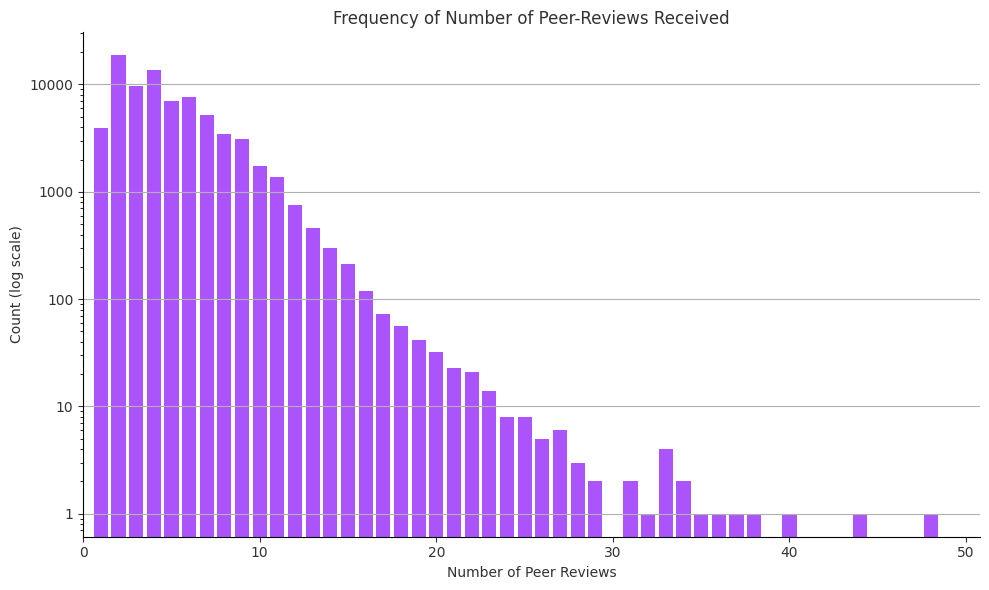

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Count the occurrences of each cited_doi
cited_doi_counts = df_cleaned['cited_doi'].value_counts()

# Count the frequency of each count
count_frequency = cited_doi_counts.value_counts().sort_index()

# Calculate the weighted mean of count frequencies
weighted_sum = (count_frequency * count_frequency.index).sum()
total_counts = count_frequency.sum()
weighted_mean = weighted_sum / total_counts

# Display the weighted mean of count_frequency
print("Weighted mean of count_frequency:", weighted_mean)

# Plotting as a histogram
plt.figure(figsize=(10, 6))

# Plotting the histogram
plt.bar(count_frequency.index, count_frequency.values, color='#AC54FB')

# Removing right and top borders
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# Removing the space between the first bar and the y-axis
plt.xlim(left=0)  # Start the x-axis at 0 to eliminate space

# Setting y-axis to logarithmic scale
plt.yscale('log')

# Display only powers of 10 on y-axis
plt.gca().yaxis.set_major_locator(ticker.LogLocator(base=10.0))
plt.gca().yaxis.set_major_formatter(ticker.LogFormatter(base=10.0))

# Changing color of axes
plt.gca().tick_params(axis='x', colors='#352f36')
plt.gca().tick_params(axis='y', colors='#352f36')

# Changing color of labels and title
plt.xlabel('Number of Peer Reviews', color='#352f36')
plt.ylabel('Count (log scale)', color='#352f36')
plt.title('Frequency of Number of Peer-Reviews Received', color='#352f36')

plt.grid(True, which='major', axis='y')  # Only horizontal grid lines

plt.tight_layout()
plt.show()


In [21]:
import pandas as pd

# Load the CSV file


# Count the occurrences of each cited_doi
cited_doi_counts = df_cleaned['cited_doi'].value_counts()

# Count the frequency of each count
count_frequency = cited_doi_counts.value_counts().sort_index()

# Create a DataFrame for the frequency data
frequency_table = pd.DataFrame({'Number of Possible Occurrences': count_frequency.index, 'Frequency': count_frequency.values})

# Display the table
print("Frequency of Cited DOI Counts:")
frequency_table


Frequency of Cited DOI Counts:


,Number of Possible Occurrences,Frequency
0,1,3944
1,2,18719
2,3,9656
3,4,13649
4,5,6981
5,6,7687
6,7,5199
7,8,3436
8,9,3109
9,10,1755


## Timespan

### timespan negativi

In [22]:
import pandas as pd

# Assuming df_cleaned is already defined and contains the data

# Count the number of rows where the column "time_span" starts with "-"
negative_timespan_count = df_cleaned[df_cleaned['time_span'].str.startswith('-')].shape[0]

# Count the number of rows where the column "time_span" does not start with "-"
positive_timespan_count = df_cleaned[~df_cleaned['time_span'].str.startswith('-')].shape[0]

# Calculate the total number of rows
total_count = df_cleaned.shape[0]

# Calculate the percentages
percentage_negative = (negative_timespan_count / total_count) * 100
percentage_positive = (positive_timespan_count / total_count) * 100

# Print the counts and percentages
print(f"Number of rows with 'time_span' starting with '-': {negative_timespan_count}")
print(f"Number of rows with 'time_span' not starting with '-': {positive_timespan_count}")
print(f"Percentage of rows with 'time_span' starting with '-': {percentage_negative:.2f}%")
print(f"Percentage of rows with 'time_span' not starting with '-': {percentage_positive:.2f}%")


Number of rows with 'time_span' starting with '-': 59975
Number of rows with 'time_span' not starting with '-': 301142
Percentage of rows with 'time_span' starting with '-': 16.61%
Percentage of rows with 'time_span' not starting with '-': 83.39%


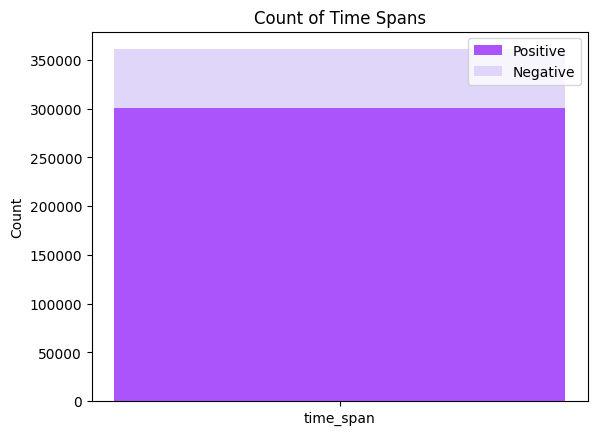

In [23]:
# Create a DataFrame with the counts
counts = pd.DataFrame({
    'time_span_type': ['negative', 'positive'],
    'count': [negative_timespan_count, positive_timespan_count]
})

# Create a stacked bar chart
fig, ax = plt.subplots()

ax.bar('time_span', counts['count'][1], label='Positive', color='#AC54FB')
ax.bar('time_span', counts['count'][0], bottom=counts['count'][1], label='Negative', color='#E0D6FA')

# Add labels and title
ax.set_ylabel('Count')
ax.set_title('Count of Time Spans')
ax.legend()

# Show the plot
plt.show()


### Timespan plot

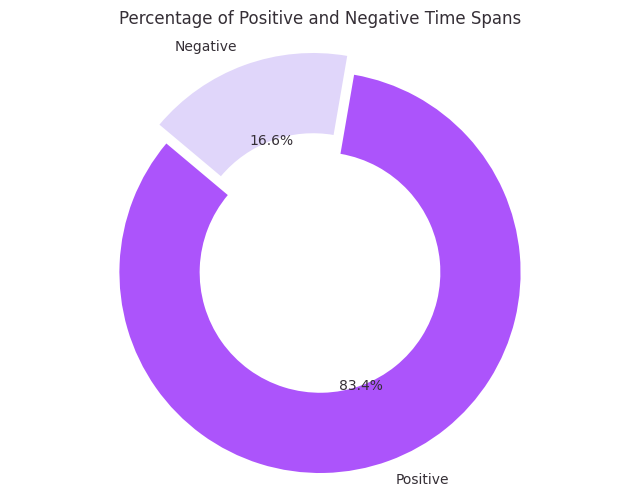

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame (replace with your actual data)
# df_cleaned = pd.DataFrame({'time_span': ['-10', '5', '-20', '15', '30', '-25']})

# Count the number of rows where the column "time_span" starts with "-"
negative_timespan_count = df_cleaned[df_cleaned['time_span'].str.startswith('-')].shape[0]

# Count the number of rows where the column "time_span" does not start with "-"
positive_timespan_count = df_cleaned[~df_cleaned['time_span'].str.startswith('-')].shape[0]

# Calculate percentages
total_count = negative_timespan_count + positive_timespan_count
negative_percentage = (negative_timespan_count / total_count) * 100
positive_percentage = (positive_timespan_count / total_count) * 100

# Create a donut chart
labels = ['Positive', 'Negative']
sizes = [positive_percentage, negative_percentage]
colors = ['#AC54FB', '#E0D6FA']  # Change positive and negative plot colors
explode = (0, 0.1)  # Explode the negative slice slightly

plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    sizes, explode=explode, labels=labels, colors=colors,
    autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.4)
)

# Customize the labels' color
for text in texts:
    text.set_color('#352f36')

# Customize the percentage text inside the donut
for autotext in autotexts:
    autotext.set_color('#352f36')

# Changing the title color
plt.title('Percentage of Positive and Negative Time Spans', color='#352f36')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [25]:
import pandas as pd


# Filter the DataFrame to include only rows where "time_span" is negative
negative_time_span_df = df_cleaned[df_cleaned['time_span'].str.startswith('-')]

# Count the occurrences of each unique "cited_venue" in the filtered DataFrame
cited_venue_counts_negative = negative_time_span_df['cited_venue'].value_counts()

# Create a new DataFrame with the counts
cited_venue_counts_negative_df = pd.DataFrame({'cited_venue': cited_venue_counts_negative.index, 'count': cited_venue_counts_negative.values})

# Display the new DataFrame
print("Count of cited_venue with negative time_span:")
cited_venue_counts_negative_df


Count of cited_venue with negative time_span:


,cited_venue,count
0,Atmospheric Chemistry and Physics,12329
1,Atmospheric Measurement Techniques,6038
2,Hydrology and Earth System Sciences,5706
3,Geoscientific Model Development,5673
4,Biogeosciences,5303
5,The Cryosphere,4194
6,Earth System Science Data,3653
7,Natural Hazards and Earth System Sciences,3341
8,Climate of the Past,2131
9,Solid Earth,1785


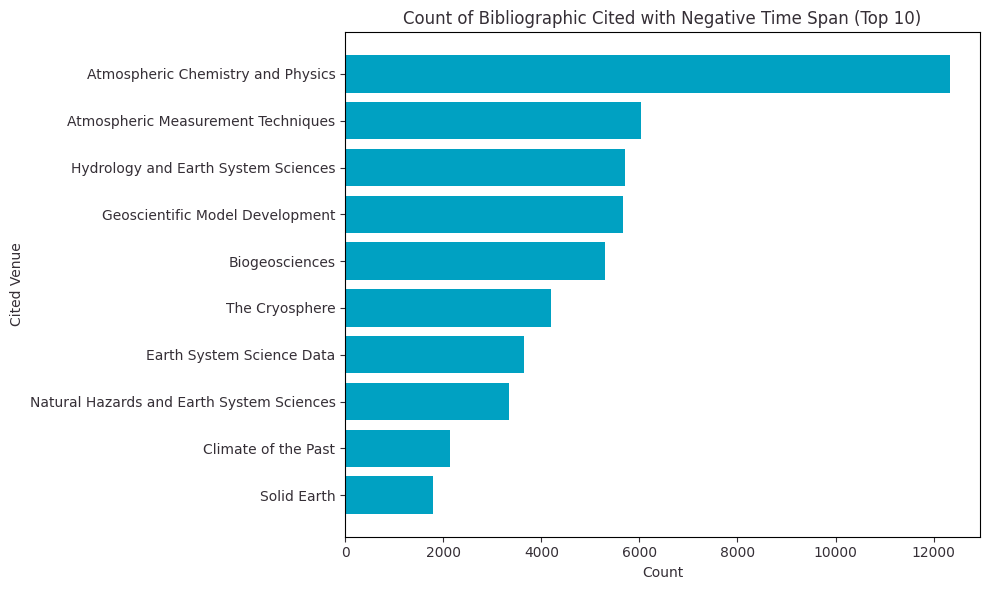

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Reverse the order of the bars by sorting in descending order by 'count'
cited_venue_counts_negative_df = cited_venue_counts_negative_df.sort_values(by='count', ascending=False)[:10]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(cited_venue_counts_negative_df['cited_venue'], cited_venue_counts_negative_df['count'], color='#00A1C2')
plt.xlabel('Count', color='#352f36')  # Change xlabel color
plt.ylabel('Cited Venue', color='#352f36')  # Change ylabel color
plt.title('Count of Bibliographic Cited with Negative Time Span (Top 10)', color='#352f36')  # Change title color
plt.tight_layout()

# Changing color of ticks
plt.gca().tick_params(axis='x', colors='#352f36')
plt.gca().tick_params(axis='y', colors='#352f36')

# Invert y-axis to have the highest count on top
plt.gca().invert_yaxis()

plt.show()


# RDF count

## create a csv from the rdf

In [27]:
# from rdflib import Graph
# import csv

# # Load the RDF file
# g = Graph()
# g.parse("upload/PROCI_RDF.ttl", format="ttl")

# # Open a CSV file for writing
# with open("PROCI_RDF.csv", "w", newline="", encoding="utf-8") as csvfile:
#     csvwriter = csv.writer(csvfile)
    
#     # Write the header
#     csvwriter.writerow(["Subject", "Predicate", "Object"])
    
#     # Iterate over each triple in the graph and write it to the CSV file
#     for s, p, o in g:
#         csvwriter.writerow([s, p, o])


In [28]:
# from rdflib import Graph
# import csv

# # # Load the RDF file
# # g = Graph()
# # g.parse("upload/PROCI_RDF.ttl", format="ttl")

# # Open a CSV file for writing
# with open("PROCI_RDF.csv", "w", newline="", encoding="utf-8") as csvfile:
#     csvwriter = csv.writer(csvfile)
    
#     # Write the header
#     csvwriter.writerow(["Subject", "Predicate", "Object"])
    
#     # Initialize row count
#     row_count = 0
    
#     # Iterate over each triple in the graph and write it to the CSV file
#     for s, p, o in g:
#         csvwriter.writerow([s, p, o])
#         row_count += 1

# # Subtract 1 from row_count to exclude the header
# row_count -= 1

# print("Number of rows excluding the header:", row_count)


In [29]:
# from rdflib import Graph
# import pandas as pd
# from collections import Counter

# # # Load the RDF file
# # g = Graph()
# # g.parse("upload/PROCI_RDF.ttl", format="ttl")

# # Open a CSV file for writing the RDF data
# with open("PROCI_RDF.csv", "w", newline="", encoding="utf-8") as csvfile:
#     csvwriter = csv.writer(csvfile)
    
#     # Write the header
#     csvwriter.writerow(["Subject", "Predicate", "Object"])
    
#     # Initialize row count
#     row_count = 0
    
#     # List to store predicates
#     predicates = []
    
#     # Iterate over each triple in the graph and write it to the CSV file
#     for s, p, o in g:
#         csvwriter.writerow([s, p, o])
#         row_count += 1
#         predicates.append(p)

# # Subtract 1 from row_count to exclude the header
# row_count -= 1

# # Count occurrences of each predicate
# predicate_counts = Counter(predicates)

# # Create a DataFrame from the predicate counts
# predicate_df = pd.DataFrame(predicate_counts.items(), columns=["Predicate", "Count"])

# # Print the result
# print("Number of rows excluding the header:", row_count)
# print("Predicate counts DataFrame:")
# predicate_df


In [30]:
# # Calculate the ratio between row_count and the first value in "Count" column
# first_count_value = predicate_df.at[0, "Count"]
# ratio = row_count / first_count_value
# print("The count of something")
# print(ratio)

# Meta

In [31]:
#count line in meta-doi

# import csv

# def count_rows_in_csv(file_path):
#     with open(file_path, mode='r', newline='') as file:
#         reader = csv.reader(file)
#         row_count = sum(1 for row in reader)
#     return row_count

# # Example usage
# file_path_2 = 'meta_doi.csv'
# print(f'The number of dois in Meta is: {count_rows_in_csv(file_path_2)}')


The number of dois in Meta is: 94582761


: 

In [ ]:
import polars as pl
import os

def read_and_process_dataframe(file_path):
    if file_path.endswith('.csv'):
        try:
            df = pl.scan_csv(file_path)
            df_normalized = df.with_columns(cited_doi=pl.col("DOI").str.strip_chars("\n.").str.to_lowercase())
            return df_normalized
        except Exception as e:
            print(f"Error reading file {file_path}: {e}")
            return None
    else:
        print(f"File {file_path} is not a CSV file.")
        return None

# Example usage
file_path = 'meta_doi.csv'
processed_df = read_and_process_dataframe(file_path)

# To convert the lazy frame to a DataFrame, you need to collect it
if processed_df is not None:
    processed_df = processed_df.collect()
    print(len(processed_df))


## Meta-peer

In [1]:
import pandas as pd

# Read the CSV files
meta_peer_df = pd.read_csv("meta_peer_cleaned.csv")

# Count unique values in the "citing_doi" column
citing_doi_count = df_cleaned["citing_doi"].nunique()

# Count unique values in the "DOI" column
doi_count = meta_peer_df["DOI"].nunique()

# Calculate missing_doi as the total count minus the DOI count
missing_doi_count = citing_doi_count - doi_count

# Ensure there are no negative values for missing_doi_count
if missing_doi_count < 0:
    missing_doi_count = 0

# Calculate the percentage of DOI and missing_doi
percentage_of_doi = (doi_count / citing_doi_count) * 100
percentage_of_missing_doi = (missing_doi_count / citing_doi_count) * 100

# Create a DataFrame with the counts and the percentages
counts_df_peers = pd.DataFrame({
    "Category": ["DOI in Crossref", "DOI in Meta", "DOI not in Meta"],
    "Unique Count": [citing_doi_count, doi_count, missing_doi_count],
    "Percentage": [100, percentage_of_doi, percentage_of_missing_doi]
})

# Display the DataFrame
counts_df_peers


NameError: name 'df_cleaned' is not defined

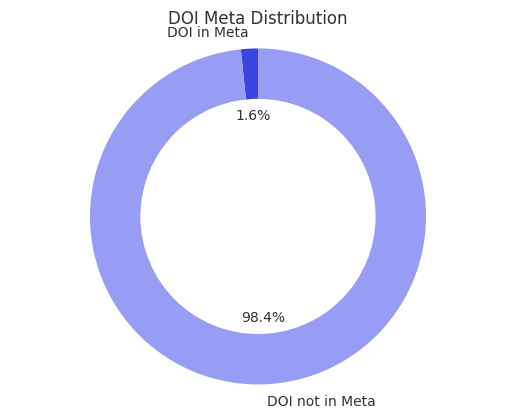

In [25]:
import matplotlib.pyplot as plt

# Custom colors
colors = ['#3C44E4', '#979CF4']
label_color = '#352f36'

# Extracting the relevant data
percentages = counts_df_peers.loc[counts_df_peers['Category'].isin(["DOI in Meta", "DOI not in Meta"]), 'Percentage']
categories = counts_df_peers.loc[counts_df_peers['Category'].isin(["DOI in Meta", "DOI not in Meta"]), 'Category']

# Plotting the donut chart with customizations
fig, ax = plt.subplots()
ax.pie(percentages, labels=categories, autopct='%1.1f%%', startangle=90, colors=colors, textprops={'color': label_color})
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Draw a circle to make it a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('DOI Meta Distribution', color=label_color)
plt.show()


In [26]:
import pandas as pd

# Read the CSV files
meta_article_df = pd.read_csv("meta_article_cleaned.csv")

# Count unique values in the "citing_doi" column
citing_doi_count = df_cleaned["cited_doi"].nunique()

# Count unique values in the "DOI" column
doi_count = meta_article_df["DOI"].nunique()

# Calculate missing_doi as the total count minus the DOI count
missing_doi_count = citing_doi_count - doi_count

# Ensure there are no negative values for missing_doi_count
if missing_doi_count < 0:
    missing_doi_count = 0

# Calculate the percentage of DOI and missing_doi
percentage_of_doi = (doi_count / citing_doi_count) * 100
percentage_of_missing_doi = (missing_doi_count / citing_doi_count) * 100

# Create a DataFrame with the counts and the percentages
counts_df_article = pd.DataFrame({
    "Category": ["DOI in Crossref", "DOI in Meta", "DOI not in Meta"],
    "Unique Count": [citing_doi_count, doi_count, missing_doi_count],
    "Percentage": [100, percentage_of_doi, percentage_of_missing_doi]
})

# Display the DataFrame
counts_df_article



,Category,Unique Count,Percentage
0,DOI in Crossref,77660,100.000000
1,DOI in Meta,70260,90.471285
2,DOI not in Meta,7400,9.528715


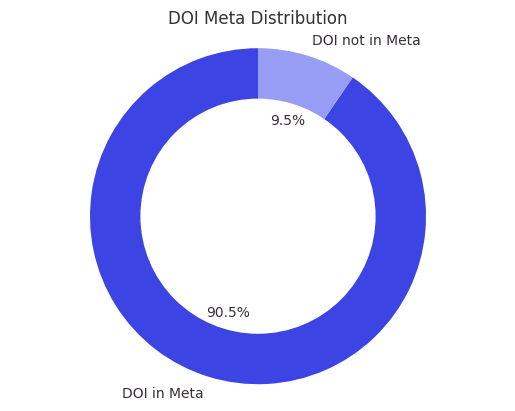

In [27]:
import matplotlib.pyplot as plt

# Custom colors
colors = ['#3C44E4', '#979CF4']
label_color = '#352f36'

# Extracting the relevant data
percentages = counts_df_article.loc[counts_df_article['Category'].isin(["DOI in Meta", "DOI not in Meta"]), 'Percentage']
categories = counts_df_article.loc[counts_df_article['Category'].isin(["DOI not in Meta", "DOI in Meta"]), 'Category']

# Plotting the donut chart with customizations
fig, ax = plt.subplots()
ax.pie(percentages, labels=categories, autopct='%1.1f%%', startangle=90, colors=colors, textprops={'color': label_color})
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Draw a circle to make it a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('DOI Meta Distribution', color=label_color)
plt.show()


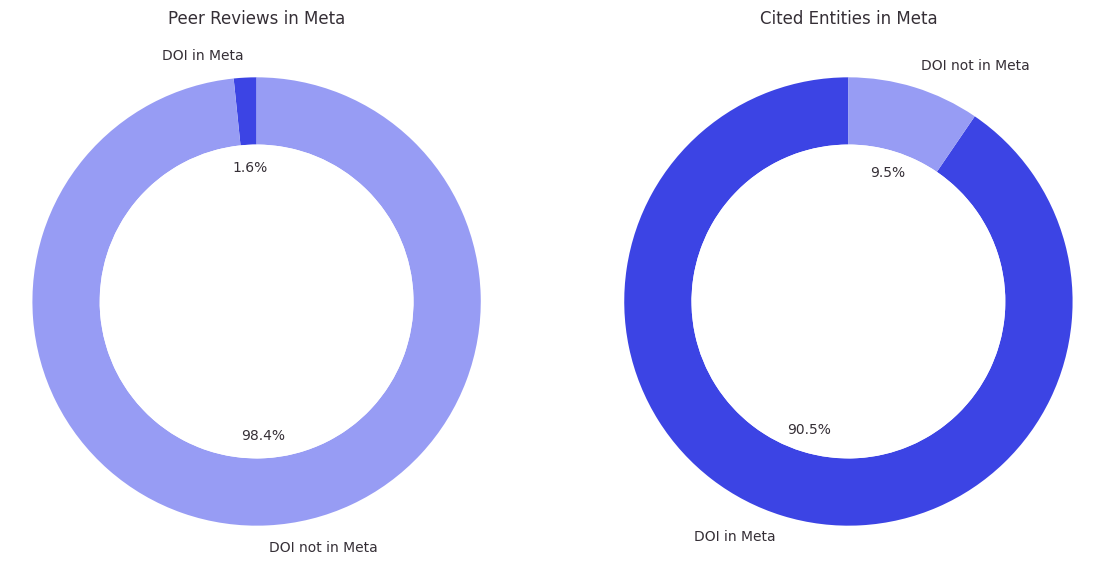

In [28]:
import matplotlib.pyplot as plt

# Custom colors and label color
colors = ['#3C44E4', '#979CF4']
label_color = '#352f36'

# Extracting the relevant data for the first plot
percentages_peers = counts_df_peers.loc[counts_df_peers['Category'].isin(["DOI in Meta", "DOI not in Meta"]), 'Percentage']
categories_peers = counts_df_peers.loc[counts_df_peers['Category'].isin(["DOI in Meta", "DOI not in Meta"]), 'Category']

# Extracting the relevant data for the second plot
percentages_article = counts_df_article.loc[counts_df_article['Category'].isin(["DOI in Meta", "DOI not in Meta"]), 'Percentage']
categories_article = counts_df_article.loc[counts_df_article['Category'].isin(["DOI in Meta", "DOI not in Meta"]), 'Category']

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Plot the first donut chart
wedges1, texts1, autotexts1 = axs[0].pie(
    percentages_peers, labels=categories_peers, autopct='%1.1f%%',
    startangle=90, colors=colors, textprops={'color': label_color},
    wedgeprops=dict(width=0.3)
)
axs[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# Draw a circle to make it a donut chart
centre_circle1 = plt.Circle((0,0),0.70,fc='white')
axs[0].add_artist(centre_circle1)
axs[0].set_title('Peer Reviews in Meta', color=label_color)

# Plot the second donut chart
wedges2, texts2, autotexts2 = axs[1].pie(
    percentages_article, labels=categories_article, autopct='%1.1f%%',
    startangle=90, colors=colors, textprops={'color': label_color},
    wedgeprops=dict(width=0.3)
)
axs[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# Draw a circle to make it a donut chart
centre_circle2 = plt.Circle((0,0),0.70,fc='white')
axs[1].add_artist(centre_circle2)
axs[1].set_title('Cited Entities in Meta', color=label_color)

plt.show()


## Both DOI and Article in Meta

In [10]:
import pandas as pd

# Read the CSV files


df1 = meta_article_df
df2 = meta_peer_df
df3 = df_cleaned

# Create an empty list to store the found rows
merged_rows = []

# Iterate over df2['DOI'] to find all the cited_doi that are in Meta
for doi in df1['DOI']:
    # Search for the DOI in df3['cited_doi']
    found_rows = df3[df3['cited_doi'] == doi]
    # Append the found rows to the list
    merged_rows.extend(found_rows.values.tolist())

# Create a DataFrame from the merged rows
merged_df = pd.DataFrame(merged_rows, columns=df3.columns)


# # Merge merged_df with df1 based on 'DOI' column. Find all citing doi that are in Meta for the cited_doi in Meta
# final_merged_df = pd.merge(df2, merged_df, how='inner', left_on='DOI', right_on='citing_doi')

# # Print the final merged dataframe
# final_merged_df


NameError: name 'meta_article_df' is not defined

In [30]:
merged_df

,oci,citing_doi,cited_doi,citing_date,citing_url,cited_url,cited_issn,cited_venue,cited_date,prov_agent,source,prov_date,time_span
0,oci:020050109043628241821630200020163010009631...,10.5194/soil-2021-109-ac2,10.5194/soil-2021-109,2022-02-03,http://dx.doi.org/10.5194/soil-2021-109-ac2,http://dx.doi.org/10.5194/soil-2021-109,NaN,NaN,2021-11-10,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P2M24D
1,oci:020050109043628241821630200020163010009631...,10.5194/soil-2021-109-ac1,10.5194/soil-2021-109,2022-02-03,http://dx.doi.org/10.5194/soil-2021-109-ac1,http://dx.doi.org/10.5194/soil-2021-109,NaN,NaN,2021-11-10,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P2M24D
2,oci:020050109043628241821630200020163010009632...,10.5194/soil-2021-109-rc1,10.5194/soil-2021-109,2021-11-29,http://dx.doi.org/10.5194/soil-2021-109-rc1,http://dx.doi.org/10.5194/soil-2021-109,NaN,NaN,2021-11-10,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P19D
3,oci:020050109043628241821630200020163010009632...,10.5194/soil-2021-109-rc2,10.5194/soil-2021-109,2021-12-28,http://dx.doi.org/10.5194/soil-2021-109-rc2,http://dx.doi.org/10.5194/soil-2021-109,NaN,NaN,2021-11-10,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P1M18D
4,oci:020050109043611166302000202630202016327120...,10.5194/bg-2022-221-rc2,10.5194/bg-2022-221,2023-01-11,http://dx.doi.org/10.5194/bg-2022-221-rc2,http://dx.doi.org/10.5194/bg-2022-221,NaN,NaN,2022-11-17,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P1M25D
...,...,...,...,...,...,...,...,...,...,...,...,...,...
337239,oci:020010106023602140309080315053703120014030...,10.1162/2e3983f5.3c0e370c,10.1101/2020.11.16.20231597,2022-03-31,http://dx.doi.org/10.1162/2e3983f5.3c0e370c,http://dx.doi.org/10.1101/2020.11.16.20231597,NaN,NaN,2020-11-18,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P1Y4M13D
337240,oci:02001050205023627123702000202040609070302-...,10.15252/rc.2022469732,10.1101/2020.11.17.362277,2022-07-25,http://dx.doi.org/10.15252/rc.2022469732,http://dx.doi.org/10.1101/2020.11.17.362277,NaN,NaN,2020-11-18,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P1Y8M7D
337241,oci:02001050205023627123702000202000104080401-...,10.15252/rc.2022014841,10.1101/2020.11.17.362277,2022-07-25,http://dx.doi.org/10.15252/rc.2022014841,http://dx.doi.org/10.1101/2020.11.17.362277,NaN,NaN,2020-11-18,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P1Y8M7D
337242,oci:02001050205023627123702000202040208090308-...,10.15252/rc.2022428938,10.1101/2020.11.17.362277,2022-07-25,http://dx.doi.org/10.15252/rc.2022428938,http://dx.doi.org/10.1101/2020.11.17.362277,NaN,NaN,2020-11-18,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P1Y8M7D


In [31]:
# This is the number of peer-review pointing to an article in META
len(merged_df.drop_duplicates())

337244

In [32]:
merged_df['cited_doi'].nunique()

70260

In [33]:
# Queste sono le peer_review che sono in Meta e il cui articolo di riferimento è in meta
merged_rows = []
# Iterate over df2['DOI'] to find all the cited_doi that are in Meta
for doi in df2['DOI']:
    
    # Search for the DOI in df3['cited_doi']
    found_rows = merged_df[merged_df['citing_doi'] == doi]
    # Append the found rows to the list
    merged_rows.extend(found_rows.values.tolist())

# Create a DataFrame from the merged rows
peer_and_article_df = pd.DataFrame(merged_rows, columns=df3.columns)

In [34]:
peer_and_article_df

,oci,citing_doi,cited_doi,citing_date,citing_url,cited_url,cited_issn,cited_venue,cited_date,prov_agent,source,prov_date,time_span
0,oci:020010000023612191214370204040704363102362...,10.1002/cjce.24474/v2/response1,10.1002/cjce.24474,2022-05-30,http://dx.doi.org/10.1002/cjce.24474/v2/response1,http://dx.doi.org/10.1002/cjce.24474,"0008-4034, 1939-019X",The Canadian Journal of Chemical Engineering,2022-05-26,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P4D
1,oci:020070505043614211815143704030406073700010...,10.7554/elife.43467.010,10.7554/elife.43467,2019-02-20,http://dx.doi.org/10.7554/elife.43467.010,http://dx.doi.org/10.7554/elife.43467,2050-084X,eLife,2019-02-08,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P12D
2,oci:020070505043614211815143704020104083700020...,10.7554/elife.42148.025,10.7554/elife.42148,2019-02-22,http://dx.doi.org/10.7554/elife.42148.025,http://dx.doi.org/10.7554/elife.42148,2050-084X,eLife,2019-02-22,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P0D
3,oci:020070505043614211815143706090301073728100...,10.7554/elife.69317.sa2,10.7554/elife.69317,2021-08-09,http://dx.doi.org/10.7554/elife.69317.sa2,http://dx.doi.org/10.7554/elife.69317,2050-084X,eLife,2021-07-29,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P11D
4,oci:020070505043614211815143704020606003700020...,10.7554/elife.42660.023,10.7554/elife.42660,2019-01-17,http://dx.doi.org/10.7554/elife.42660.023,http://dx.doi.org/10.7554/elife.42660,2050-084X,eLife,2018-12-31,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P17D
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5557,oci:020010000023602000500630700030837010203040...,10.1002/2050-7038.12349/v1/review2,10.1002/2050-7038.12349,2020-02-18,http://dx.doi.org/10.1002/2050-7038.12349/v1/r...,http://dx.doi.org/10.1002/2050-7038.12349,"2050-7038, 2050-7038",International Transactions on Electrical Energ...,2020-02-14,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P4D
5558,oci:020070505043614211815143705030405063728100...,10.7554/elife.53456.sa2,10.7554/elife.53456,2020-02-18,http://dx.doi.org/10.7554/elife.53456.sa2,http://dx.doi.org/10.7554/elife.53456,2050-084X,eLife,2020-01-21,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P28D
5559,oci:020070505043614211815143705020707093728100...,10.7554/elife.52779.sa1,10.7554/elife.52779,2020-04-01,http://dx.doi.org/10.7554/elife.52779.sa1,http://dx.doi.org/10.7554/elife.52779,2050-084X,eLife,2020-03-18,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P14D
5560,oci:020050109043610122563020002006301000308632...,10.5194/acp-2020-1038-rc1,10.5194/acp-21-6541-2021,2020-11-18,http://dx.doi.org/10.5194/acp-2020-1038-rc1,http://dx.doi.org/10.5194/acp-21-6541-2021,1680-7324,Atmospheric Chemistry and Physics,2021-04-30,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,-P5M12D


In [35]:
len(peer_and_article_df)

5562

In [36]:
peer_and_article_df['cited_doi'].nunique()

5428

In [37]:
# Ratio peer and article over unique

len(peer_and_article_df) / peer_and_article_df['cited_doi'].nunique()

1.024686809137804

In [38]:
counts_df_article


,Category,Unique Count,Percentage
0,DOI in Crossref,77660,100.000000
1,DOI in Meta,70260,90.471285
2,DOI not in Meta,7400,9.528715


In [39]:
unique_counts_df


# Calculate the number of unique elements in each specified column
unique_article_counts = {
    'Cited Entities in Crossref': df['cited_doi'].nunique(),
    'Cited Entitis in Meta': counts_df_article['Unique Count'][1],
    'Cited Entities in Meta whose PR are also in Meta': peer_and_article_df['cited_doi'].nunique()
}

# Create a new DataFrame with the results
unique_article_counts = pd.DataFrame(list(unique_article_counts.items()), columns=['entity', 'count'])

unique_article_counts

,entity,count
0,Cited Entities in Crossref,77660
1,Cited Entitis in Meta,70260
2,Cited Entities in Meta whose PR are also in Meta,5428


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data to replicate your description (you would replace this with your actual data)
data = {
    'Reviewed entities in Meta': counts_df_article['Unique Count'][1],
    'Both Peer Review and reviewed entity in Meta': peer_and_article_df['cited_doi'].nunique()
}

# Create DataFrame
unique_article_counts = pd.DataFrame(list(data.items()), columns=['entity', 'count'])

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(unique_article_counts['entity'], unique_article_counts['count'], color='#3C44E4')
plt.xlabel('Entity', color='#352f36')
plt.ylabel('Count', color='#352f36')
plt.title('Frequency of reviewed entities in Meta and frequency of Peer Reviews that are also in Meta', color='#352f36')
plt.xticks(ha='center', color='#352f36')
plt.tight_layout()
plt.yticks(color='#352f36')

# Display the plot
plt.show()


NameError: name 'counts_df_article' is not defined

In [41]:
#Percentage of citations
len(merged_df.drop_duplicates()) * 100 / unique_counts_df['count'][0]

93.38912319276024

In [42]:
# Create an empty list to store the found rows
merged_rows = []

# Iterate over df2['DOI'] to find all the cited_doi that are in Meta
for doi in df2['DOI']:
    # Search for the DOI in df3['cited_doi']
    found_rows = df3[df3['citing_doi'] == doi]
    # Append the found rows to the list
    merged_rows.extend(found_rows.values.tolist())

# Create a DataFrame from the merged rows
merged_df_peer = pd.DataFrame(merged_rows, columns=df3.columns)

In [43]:
merged_df_peer

,oci,citing_doi,cited_doi,citing_date,citing_url,cited_url,cited_issn,cited_venue,cited_date,prov_agent,source,prov_date,time_span
0,oci:020010000023612191214370204040704363102362...,10.1002/cjce.24474/v2/response1,10.1002/cjce.24474,2022-05-30,http://dx.doi.org/10.1002/cjce.24474/v2/response1,http://dx.doi.org/10.1002/cjce.24474,"0008-4034, 1939-019X",The Canadian Journal of Chemical Engineering,2022-05-26,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P4D
1,oci:020070505043614211815143704030406073700010...,10.7554/elife.43467.010,10.7554/elife.43467,2019-02-20,http://dx.doi.org/10.7554/elife.43467.010,http://dx.doi.org/10.7554/elife.43467,2050-084X,eLife,2019-02-08,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P12D
2,oci:020070505043614211815143704020104083700020...,10.7554/elife.42148.025,10.7554/elife.42148,2019-02-22,http://dx.doi.org/10.7554/elife.42148.025,http://dx.doi.org/10.7554/elife.42148,2050-084X,eLife,2019-02-22,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P0D
3,oci:020070505043614211815143706090301073728100...,10.7554/elife.69317.sa2,10.7554/elife.69317,2021-08-09,http://dx.doi.org/10.7554/elife.69317.sa2,http://dx.doi.org/10.7554/elife.69317,2050-084X,eLife,2021-07-29,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P11D
4,oci:020070505043614211815143704020606003700020...,10.7554/elife.42660.023,10.7554/elife.42660,2019-01-17,http://dx.doi.org/10.7554/elife.42660.023,http://dx.doi.org/10.7554/elife.42660,2050-084X,eLife,2018-12-31,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P17D
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5778,oci:020070505043614211815143705030405063728100...,10.7554/elife.53456.sa2,10.7554/elife.53456,2020-02-18,http://dx.doi.org/10.7554/elife.53456.sa2,http://dx.doi.org/10.7554/elife.53456,2050-084X,eLife,2020-01-21,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P28D
5779,oci:020070505043614211815143705020707093728100...,10.7554/elife.52779.sa1,10.7554/elife.52779,2020-04-01,http://dx.doi.org/10.7554/elife.52779.sa1,http://dx.doi.org/10.7554/elife.52779,2050-084X,eLife,2020-03-18,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P14D
5780,oci:020050109043610122563020002006301000308632...,10.5194/acp-2020-1038-rc1,10.5194/acp-21-6541-2021,2020-11-18,http://dx.doi.org/10.5194/acp-2020-1038-rc1,http://dx.doi.org/10.5194/acp-21-6541-2021,1680-7324,Atmospheric Chemistry and Physics,2021-04-30,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,-P5M12D
5781,oci:020050109043610122563020002006301000308632...,10.5194/acp-2020-1038-rc1,10.5194/acp-2020-1038,2020-11-18,http://dx.doi.org/10.5194/acp-2020-1038-rc1,http://dx.doi.org/10.5194/acp-2020-1038,NaN,NaN,2020-10-22,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P27D


In [44]:
# Queste sono le peer_review che sono in Meta e il cui articolo di riferimento è in meta
merged_rows = []
# Iterate over df2['DOI'] to find all the cited_doi that are in Meta
for doi in df2['DOI']:
    
    # Search for the DOI in df3['cited_doi']
    found_rows = merged_df_peer[merged_df_peer['citing_doi'] == doi]
    # Append the found rows to the list
    merged_rows.extend(found_rows.values.tolist())

# Create a DataFrame from the merged rows
peer_doi = pd.DataFrame(merged_rows, columns=df3.columns)

In [45]:
peer_doi

,oci,citing_doi,cited_doi,citing_date,citing_url,cited_url,cited_issn,cited_venue,cited_date,prov_agent,source,prov_date,time_span
0,oci:020010000023612191214370204040704363102362...,10.1002/cjce.24474/v2/response1,10.1002/cjce.24474,2022-05-30,http://dx.doi.org/10.1002/cjce.24474/v2/response1,http://dx.doi.org/10.1002/cjce.24474,"0008-4034, 1939-019X",The Canadian Journal of Chemical Engineering,2022-05-26,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P4D
1,oci:020070505043614211815143704030406073700010...,10.7554/elife.43467.010,10.7554/elife.43467,2019-02-20,http://dx.doi.org/10.7554/elife.43467.010,http://dx.doi.org/10.7554/elife.43467,2050-084X,eLife,2019-02-08,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P12D
2,oci:020070505043614211815143704020104083700020...,10.7554/elife.42148.025,10.7554/elife.42148,2019-02-22,http://dx.doi.org/10.7554/elife.42148.025,http://dx.doi.org/10.7554/elife.42148,2050-084X,eLife,2019-02-22,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P0D
3,oci:020070505043614211815143706090301073728100...,10.7554/elife.69317.sa2,10.7554/elife.69317,2021-08-09,http://dx.doi.org/10.7554/elife.69317.sa2,http://dx.doi.org/10.7554/elife.69317,2050-084X,eLife,2021-07-29,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P11D
4,oci:020070505043614211815143704020606003700020...,10.7554/elife.42660.023,10.7554/elife.42660,2019-01-17,http://dx.doi.org/10.7554/elife.42660.023,http://dx.doi.org/10.7554/elife.42660,2050-084X,eLife,2018-12-31,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P17D
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5778,oci:020070505043614211815143705030405063728100...,10.7554/elife.53456.sa2,10.7554/elife.53456,2020-02-18,http://dx.doi.org/10.7554/elife.53456.sa2,http://dx.doi.org/10.7554/elife.53456,2050-084X,eLife,2020-01-21,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P28D
5779,oci:020070505043614211815143705020707093728100...,10.7554/elife.52779.sa1,10.7554/elife.52779,2020-04-01,http://dx.doi.org/10.7554/elife.52779.sa1,http://dx.doi.org/10.7554/elife.52779,2050-084X,eLife,2020-03-18,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P14D
5780,oci:020050109043610122563020002006301000308632...,10.5194/acp-2020-1038-rc1,10.5194/acp-21-6541-2021,2020-11-18,http://dx.doi.org/10.5194/acp-2020-1038-rc1,http://dx.doi.org/10.5194/acp-21-6541-2021,1680-7324,Atmospheric Chemistry and Physics,2021-04-30,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,-P5M12D
5781,oci:020050109043610122563020002006301000308632...,10.5194/acp-2020-1038-rc1,10.5194/acp-2020-1038,2020-11-18,http://dx.doi.org/10.5194/acp-2020-1038-rc1,http://dx.doi.org/10.5194/acp-2020-1038,NaN,NaN,2020-10-22,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P27D


In [46]:
# Queste sono le peer_review che sono in Meta e il cui articolo di riferimento è in meta
merged_rows = []
# Iterate over df2['DOI'] to find all the cited_doi that are in Meta
for doi in df1['DOI']:
    
    # Search for the DOI in df3['cited_doi']
    found_rows = peer_doi[peer_doi['cited_doi'] == doi]
    # Append the found rows to the list
    merged_rows.extend(found_rows.values.tolist())

# Create a DataFrame from the merged rows
article_and_peer_df = pd.DataFrame(merged_rows, columns=df3.columns)

In [47]:
article_and_peer_df

,oci,citing_doi,cited_doi,citing_date,citing_url,cited_url,cited_issn,cited_venue,cited_date,prov_agent,source,prov_date,time_span
0,oci:020070505043614211815143703040303043700010...,10.7554/elife.34334.011,10.7554/elife.34334,2018-03-05,http://dx.doi.org/10.7554/elife.34334.011,http://dx.doi.org/10.7554/elife.34334,2050-084X,eLife,2018-02-26,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P7D
1,oci:020070505043614211815143703040802033700030...,10.7554/elife.34823.030,10.7554/elife.34823,2018-03-05,http://dx.doi.org/10.7554/elife.34823.030,http://dx.doi.org/10.7554/elife.34823,2050-084X,eLife,2018-02-26,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P7D
2,oci:020070505043614211815143703010504033700020...,10.7554/elife.31543.023,10.7554/elife.31543,2018-03-07,http://dx.doi.org/10.7554/elife.31543.023,http://dx.doi.org/10.7554/elife.31543,2050-084X,eLife,2018-02-26,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P9D
3,oci:020070505043614211815143703020409063700020...,10.7554/elife.32496.020,10.7554/elife.32496,2018-03-29,http://dx.doi.org/10.7554/elife.32496.020,http://dx.doi.org/10.7554/elife.32496,2050-084X,eLife,2018-03-15,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P14D
4,oci:020070505043614211815143703030701003700010...,10.7554/elife.33710.014,10.7554/elife.33710,2018-03-23,http://dx.doi.org/10.7554/elife.33710.014,http://dx.doi.org/10.7554/elife.33710,2050-084X,eLife,2018-03-12,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P11D
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5557,oci:020070505043614211815143706060807073728100...,10.7554/elife.66877.sa2,10.7554/elife.66877,2021-09-07,http://dx.doi.org/10.7554/elife.66877.sa2,http://dx.doi.org/10.7554/elife.66877,2050-084X,eLife,2021-09-07,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P0D
5558,oci:020070505043614211815143706070300083728100...,10.7554/elife.67308.sa2,10.7554/elife.67308,2021-08-24,http://dx.doi.org/10.7554/elife.67308.sa2,http://dx.doi.org/10.7554/elife.67308,2050-084X,eLife,2021-08-24,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P0D
5559,oci:020010101013619141137010401000636310236271...,10.1111/jeb.14106/v2/response1,10.1111/jeb.14106,2022-10-27,http://dx.doi.org/10.1111/jeb.14106/v2/response1,http://dx.doi.org/10.1111/jeb.14106,"1010-061X, 1420-9101",Journal of Evolutionary Biology,2022-10-27,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P0D
5560,oci:020050109043617142828630200020163030663101...,10.5194/hess-2021-36-ac4,10.5194/hess-2021-36,2021-04-13,http://dx.doi.org/10.5194/hess-2021-36-ac4,http://dx.doi.org/10.5194/hess-2021-36,NaN,NaN,2021-02-10,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P2M3D


In [48]:
len(article_and_peer_df)

5562

In [49]:
article_and_peer_df['cited_doi'].nunique()

5428

In [86]:
unique_counts_df


# Calculate the number of unique elements in each specified column
unique_article_counts = {
    'Citing in Meta': counts_df_peers['Unique Count'][1],
    'Cited in Meta whose citing is in Meta': article_and_peer_df['citing_doi'].nunique()
}

# Create a new DataFrame with the results
unique_peers_counts = pd.DataFrame(list(unique_article_counts.items()), columns=['entity', 'count'])

unique_peers_counts

,entity,count
0,Citing in Meta,5689
1,Cited in Meta whose citing is in Meta,5514


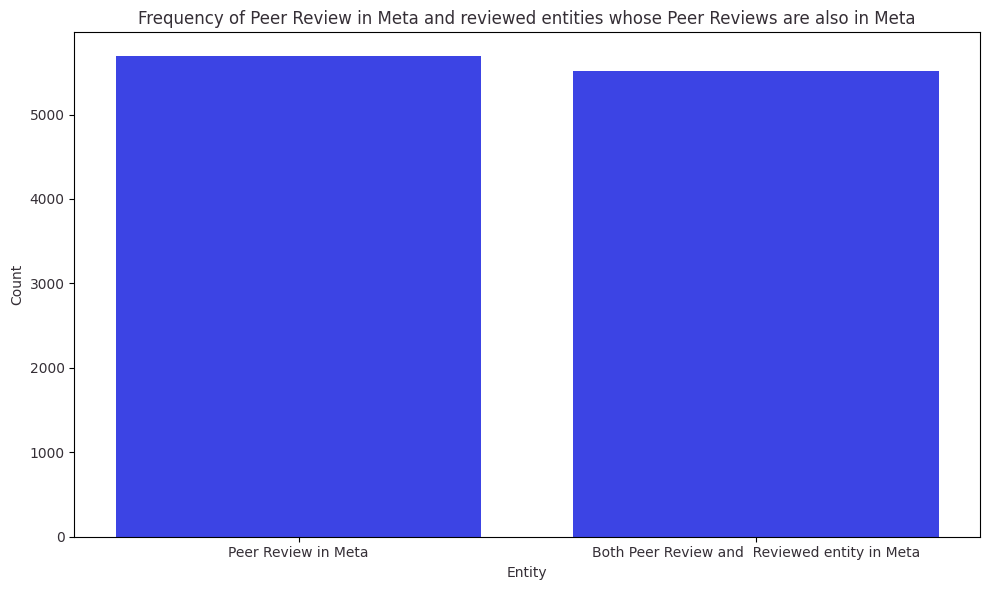

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

# Data from the second part of your code (already prepared)
unique_article_counts = {
    'Peer Review in Meta': counts_df_peers['Unique Count'][1],
    'Both Peer Review and  Reviewed entity in Meta': article_and_peer_df['citing_doi'].nunique()
}

# Create DataFrame with unique counts
unique_peers_counts = pd.DataFrame(list(unique_article_counts.items()), columns=['entity', 'count'])

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(unique_peers_counts['entity'], unique_peers_counts['count'], color='#3C44E4')  # Use unique_peers_counts DataFrame
plt.xlabel('Entity', color='#352f36')
plt.ylabel('Count', color='#352f36')
plt.title('Frequency of Peer Review in Meta and reviewed entities whose Peer Reviews are also in Meta', color='#352f36')
plt.xticks(ha='center', color='#352f36')
plt.tight_layout()
plt.yticks(color='#352f36')

# Display the plot
plt.show()


In [93]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Sample data to replicate your description (replace this with your actual data)
# counts_df_article = pd.DataFrame({'Unique Count': [10, 20]})  # Replace with actual data
# peer_and_article_df = pd.DataFrame({'cited_doi': ['doi1', 'doi2', 'doi1', 'doi3']})  # Replace with actual data

# # Data for the first plot
# data1 = {
#     'Cited in Meta': counts_df_article['Unique Count'][1],
#     'Cited Entities in Meta whose PR are also in Meta': peer_and_article_df['cited_doi'].nunique()
# }

# # Create DataFrame for the first plot
# unique_article_counts = pd.DataFrame(list(data1.items()), columns=['entity', 'count'])

# # Assuming the second dataset also contains multiple entities and counts
# data2 = {
#     'Cited Entity A': 15,  # Replace with actual data
#     'Cited Entity B': 5   # Replace with actual data
# }

# # Create DataFrame for the second plot
# unique_peers_counts = pd.DataFrame(list(data2.items()), columns=['entity', 'count'])

# # Plotting
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# # First subplot
# ax1.bar(unique_article_counts['entity'], unique_article_counts['count'], color='#3C44E4')
# ax1.set_xlabel('Entity', color='#352f36')
# ax1.set_ylabel('Count', color='#352f36')
# ax1.set_title('Cited in Meta vs. Cited Entities in Meta whose PR are also in Meta', color='#352f36')
# ax1.set_xticklabels(unique_article_counts['entity'], ha='center', color='#352f36')
# ax1.tick_params(axis='y', colors='#352f36')

# # Second subplot
# ax2.bar(unique_peers_counts['entity'], unique_peers_counts['count'], color='#3C44E4')
# ax2.set_xlabel('Entity', color='#352f36')
# ax2.set_ylabel('Count', color='#352f36')
# ax2.set_title('Cited Entities in Meta whose PR are also in Meta', color='#352f36')
# ax2.set_xticklabels(unique_peers_counts['entity'], ha='center', color='#352f36')
# ax2.tick_params(axis='y', colors='#352f36')

# plt.tight_layout()

# # Display the plot
# plt.show()


# TOP Venues

In [53]:
import pandas as pd

# Read the CSV file into a DataFrame
venues_df = pd.read_csv('venues_results.csv')

# Sort the DataFrame by 'count' in descending order and select the top 10 rows
venues_df_10 = venues_df.sort_values(by='count', ascending=False).head(10)

# Display the sorted DataFrame
venues_df_10.style.hide(axis="index")


issn1,issn2,cited_venue,count
nan,nan,nan,38811
2167-8359,nan,PeerJ,38597
2050-084X,nan,eLife,30900
1680-7324,nan,Atmospheric Chemistry and Physics,15108
0950-5423,1365-2621,International Journal of Food Science & Technology,13312
0953-816X,1460-9568,European Journal of Neuroscience,12032
1462-8902,1463-1326,"Diabetes, Obesity and Metabolism",11677
0309-2402,1365-2648,Journal of Advanced Nursing,9443
2162-3279,2162-3279,Brain and Behavior,8273
2050-7038,2050-7038,International Transactions on Electrical Energy Systems,7497


Title of the venue,Unique ISSN,Print ISSN,Online ISSN,Number of peer review received 
n/a,n/a,n/a,n/a,38811
PeerJ,2167-8359,n/a,n/a,38597
eLife,2050-084X,n/a,n/a,30900
Atmospheric Chemistry and Physics,1680-7324,n/a,n/a,15108
International Journal of Food Science & Technology,,0950-5423,1365-2621,13312
European Journal of Neuroscience,,1460-9568,0953-816X,12032
Diabetes, Obesity and Metabolism,,1462-8902,1463-1326,11677
Journal of Advanced Nursing,,0309-2402,1365-2648,9443
Brain and Behavior,2162-3279,,,8273
International Transactions on Electrical Energy Systems,2050-7038,,,7497



,issn1,issn2,cited_venue,count
0,0001-6314,1600-0404,Acta Neurologica Scandinavica,580
1,0001-690X,1600-0447,Acta Psychiatrica Scandinavica,2041
2,0002-9092,1467-8276,American Journal of Agricultural Economics,1
3,0003-1224,1939-8271,American Sociological Review,1
4,0003-4819,1539-3704,Annals of Internal Medicine,1
...,...,...,...,...
591,2772-6762,NaN,SciPost Chemistry,8
592,2772-6789,NaN,SciPost Astronomy,3
593,2831-6223,NaN,PeerJ Organic Chemistry,6
594,2949-804X,NaN,SciPost Physics Codebases,6


In [55]:
df_cleaned

,oci,citing_doi,cited_doi,citing_date,citing_url,cited_url,cited_issn,cited_venue,cited_date,prov_agent,source,prov_date,time_span
0,oci:020070505043614211815143702090604083700010...,10.7554/elife.29648.014,10.7554/elife.29648,2017-10-20,http://dx.doi.org/10.7554/elife.29648.014,http://dx.doi.org/10.7554/elife.29648,2050-084X,eLife,2017-09-11,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P1M9D
1,oci:020070505043614211815143702090604083700010...,10.7554/elife.29648.015,10.7554/elife.29648,2017-10-20,http://dx.doi.org/10.7554/elife.29648.015,http://dx.doi.org/10.7554/elife.29648,2050-084X,eLife,2017-09-11,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P1M9D
2,oci:020070505043614211815143702020509093700030...,10.7554/elife.22599.030,10.7554/elife.22599,2017-10-30,http://dx.doi.org/10.7554/elife.22599.030,http://dx.doi.org/10.7554/elife.22599,2050-084X,eLife,2017-09-11,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P1M19D
3,oci:020070505043614211815143702020509093700030...,10.7554/elife.22599.031,10.7554/elife.22599,2017-10-30,http://dx.doi.org/10.7554/elife.22599.031,http://dx.doi.org/10.7554/elife.22599,2050-084X,eLife,2017-09-11,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P1M19D
4,oci:020070505043614211815143702060905023700020...,10.7554/elife.26952.025,10.7554/elife.26952,2017-09-26,http://dx.doi.org/10.7554/elife.26952.025,http://dx.doi.org/10.7554/elife.26952,2050-084X,eLife,2017-09-11,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P15D
...,...,...,...,...,...,...,...,...,...,...,...,...,...
416527,oci:020050109043628146302000201630105036327120...,10.5194/se-2021-153-rc2,10.5194/se-13-1027-2022,2022-03-10,http://dx.doi.org/10.5194/se-2021-153-rc2,http://dx.doi.org/10.5194/se-13-1027-2022,1869-9529,Solid Earth,2022-06-22,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,-P3M12D
416528,oci:020050109043628146302000201630105036327120...,10.5194/se-2021-153-rc1,10.5194/se-13-1027-2022,2022-03-01,http://dx.doi.org/10.5194/se-2021-153-rc1,http://dx.doi.org/10.5194/se-13-1027-2022,1869-9529,Solid Earth,2022-06-22,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,-P3M21D
416529,oci:020070505043614211815143707040501093728100...,10.7554/elife.74519.sa2,10.7554/elife.74519,2022-06-22,http://dx.doi.org/10.7554/elife.74519.sa2,http://dx.doi.org/10.7554/elife.74519,2050-084X,eLife,2022-06-22,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P0D
416530,oci:020070505043614211815143707040501093728100...,10.7554/elife.74519.sa1,10.7554/elife.74519,2022-06-22,http://dx.doi.org/10.7554/elife.74519.sa1,http://dx.doi.org/10.7554/elife.74519,2050-084X,eLife,2022-06-22,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P0D


In [56]:
import pandas as pd

# Read the CSV file into a DataFrame
venues_df = pd.read_csv('venues_results.csv')

# Function to check if both 'issn1' and 'issn2' are empty
def check_empty(row):
    if pd.isna(row['issn1']) and pd.isna(row['issn2']):
        if pd.isna(row['cited_venue']):
            return 'None'
        else:
            return str(row['cited_venue'])
    else:
        return str(row['cited_venue'])

# Apply the function to create a new column 'venue'
venues_df['venue'] = venues_df.apply(check_empty, axis=1)

print(len(venues_df['venue']))

# Display the DataFrame
venues_df['venue']


596


0                   Acta Neurologica Scandinavica
1                  Acta Psychiatrica Scandinavica
2      American Journal of Agricultural Economics
3                    American Sociological Review
4                     Annals of Internal Medicine
                          ...                    
591                             SciPost Chemistry
592                             SciPost Astronomy
593                       PeerJ Organic Chemistry
594                     SciPost Physics Codebases
595                            Migration Politics
Name: venue, Length: 596, dtype: object

In [57]:
import pandas as pd

# Read the CSV file into a DataFrame
venues_df = pd.read_csv('venues_results.csv')

# Filter the DataFrame to include only rows where both 'issn1' and 'issn2' are empty
filtered_df = venues_df[(venues_df['issn1'].isna()) & (venues_df['issn2'].isna())]

# Create a new DataFrame with 'cited_venue', 'issn1', 'issn2', and 'count' columns
result_df = filtered_df[['cited_venue', 'issn1', 'issn2', 'count']]

# Order the DataFrame based on ascending values of 'count' column
result_df = result_df.sort_values(by='count', ascending=False)

print(len(result_df))

# Display the result DataFrame
result_df


22


,cited_venue,issn1,issn2,count
238,NaN,NaN,NaN,38811
255,SciPost Physics,NaN,NaN,131
249,PeerJ Materials Science,NaN,NaN,66
259,SciPost Physics Proceedings,NaN,NaN,48
247,PeerJ Analytical Chemistry,NaN,NaN,47
257,SciPost Physics Core,NaN,NaN,27
243,Definitions,NaN,NaN,20
250,PeerJ Organic Chemistry,NaN,NaN,18
256,SciPost Physics Codebases,NaN,NaN,17
258,SciPost Physics Lecture Notes,NaN,NaN,16


In [59]:
import pandas as pd

# Read the CSV file into a DataFrame
venues_df = pd.read_csv('venues_results.csv')

# Filter the DataFrame to include only rows where both 'issn1' and 'issn2' are empty
filtered_df = venues_df[(venues_df['issn1'].isna()) & (venues_df['issn2'].isna())]

# Create a new DataFrame with 'cited_venue', 'issn1', 'issn2', and 'count' columns
result_df = filtered_df[['cited_venue', 'issn1', 'issn2', 'count']]

# Order the DataFrame based on ascending values of 'count' column
result_df = result_df.sort_values(by='count', ascending=False)

# Remove the first row
result_df = result_df.iloc[1:]

print(len(result_df))

# Display the result DataFrame
result_df


21


,cited_venue,issn1,issn2,count
255,SciPost Physics,NaN,NaN,131
249,PeerJ Materials Science,NaN,NaN,66
259,SciPost Physics Proceedings,NaN,NaN,48
247,PeerJ Analytical Chemistry,NaN,NaN,47
257,SciPost Physics Core,NaN,NaN,27
243,Definitions,NaN,NaN,20
250,PeerJ Organic Chemistry,NaN,NaN,18
256,SciPost Physics Codebases,NaN,NaN,17
258,SciPost Physics Lecture Notes,NaN,NaN,16
246,Migration Politics,NaN,NaN,15


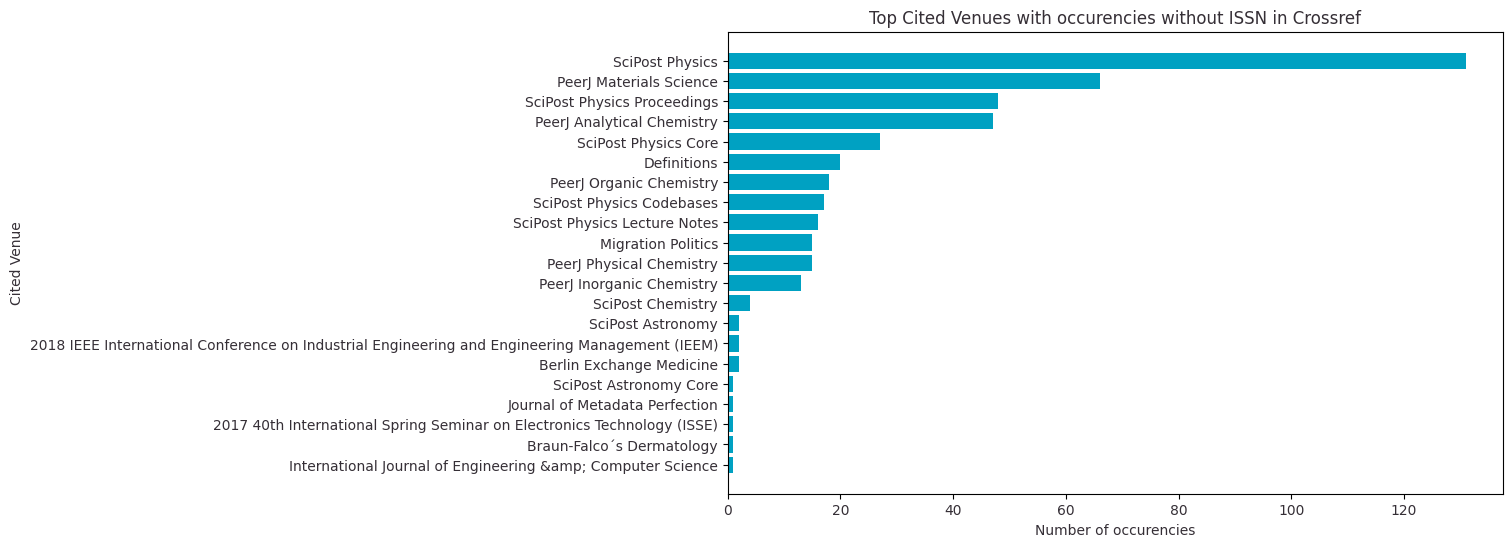

In [84]:
import matplotlib.pyplot as plt

# Sort the DataFrame based on descending values of 'count'
result_df_desc = result_df.sort_values(by='count', ascending=True)

# Plot the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(result_df_desc['cited_venue'], result_df_desc['count'], color='#00A1C2')
plt.xlabel('Number of occurencies', color='#352f36')
plt.ylabel('Cited Venue', color='#352f36')
plt.title('Top Cited Venues with occurencies without ISSN in Crossref', color='#352f36')
plt.xticks(color='#352f36')
plt.yticks(color='#352f36')
plt.show()


## Best article in top venues

In [69]:
df3

,oci,citing_doi,cited_doi,citing_date,citing_url,cited_url,cited_issn,cited_venue,cited_date,prov_agent,source,prov_date,time_span
0,oci:020070505043614211815143702090604083700010...,10.7554/elife.29648.014,10.7554/elife.29648,2017-10-20,http://dx.doi.org/10.7554/elife.29648.014,http://dx.doi.org/10.7554/elife.29648,2050-084X,eLife,2017-09-11,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P1M9D
1,oci:020070505043614211815143702090604083700010...,10.7554/elife.29648.015,10.7554/elife.29648,2017-10-20,http://dx.doi.org/10.7554/elife.29648.015,http://dx.doi.org/10.7554/elife.29648,2050-084X,eLife,2017-09-11,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P1M9D
2,oci:020070505043614211815143702020509093700030...,10.7554/elife.22599.030,10.7554/elife.22599,2017-10-30,http://dx.doi.org/10.7554/elife.22599.030,http://dx.doi.org/10.7554/elife.22599,2050-084X,eLife,2017-09-11,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P1M19D
3,oci:020070505043614211815143702020509093700030...,10.7554/elife.22599.031,10.7554/elife.22599,2017-10-30,http://dx.doi.org/10.7554/elife.22599.031,http://dx.doi.org/10.7554/elife.22599,2050-084X,eLife,2017-09-11,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P1M19D
4,oci:020070505043614211815143702060905023700020...,10.7554/elife.26952.025,10.7554/elife.26952,2017-09-26,http://dx.doi.org/10.7554/elife.26952.025,http://dx.doi.org/10.7554/elife.26952,2050-084X,eLife,2017-09-11,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P15D
...,...,...,...,...,...,...,...,...,...,...,...,...,...
416527,oci:020050109043628146302000201630105036327120...,10.5194/se-2021-153-rc2,10.5194/se-13-1027-2022,2022-03-10,http://dx.doi.org/10.5194/se-2021-153-rc2,http://dx.doi.org/10.5194/se-13-1027-2022,1869-9529,Solid Earth,2022-06-22,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,-P3M12D
416528,oci:020050109043628146302000201630105036327120...,10.5194/se-2021-153-rc1,10.5194/se-13-1027-2022,2022-03-01,http://dx.doi.org/10.5194/se-2021-153-rc1,http://dx.doi.org/10.5194/se-13-1027-2022,1869-9529,Solid Earth,2022-06-22,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,-P3M21D
416529,oci:020070505043614211815143707040501093728100...,10.7554/elife.74519.sa2,10.7554/elife.74519,2022-06-22,http://dx.doi.org/10.7554/elife.74519.sa2,http://dx.doi.org/10.7554/elife.74519,2050-084X,eLife,2022-06-22,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P0D
416530,oci:020070505043614211815143707040501093728100...,10.7554/elife.74519.sa1,10.7554/elife.74519,2022-06-22,http://dx.doi.org/10.7554/elife.74519.sa1,http://dx.doi.org/10.7554/elife.74519,2050-084X,eLife,2022-06-22,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P0D


In [74]:
filtered_df3 = filtered_df3 = venues_df[venues_df['cited_venue'].isin(df3['cited_venue'])]
filtered_df3

,issn1,issn2,cited_venue,count
0,0001-6314,1600-0404,Acta Neurologica Scandinavica,580
1,0001-690X,1600-0447,Acta Psychiatrica Scandinavica,2041
2,0002-9092,1467-8276,American Journal of Agricultural Economics,1
3,0003-1224,1939-8271,American Sociological Review,1
4,0003-4819,1539-3704,Annals of Internal Medicine,1
...,...,...,...,...
591,2772-6762,NaN,SciPost Chemistry,8
592,2772-6789,NaN,SciPost Astronomy,3
593,2831-6223,NaN,PeerJ Organic Chemistry,6
594,2949-804X,NaN,SciPost Physics Codebases,6


In [95]:
import pandas as pd

# Step 1: Filter the values in df3['cited_venues'] that match any value in venues_df['cited_venue']
filtered_df3 = df3[df3['cited_venue'].isin(venues_df['cited_venue'])]

# Step 2: Create a new DataFrame with the filtered values and their corresponding DOIs
filtered_citations_df = filtered_df3[['cited_doi', 'cited_venue']]

# Step 3: Create a final DataFrame that counts each cited_doi and their respective cited_venue
final_df = filtered_citations_df.groupby(['cited_doi', 'cited_venue']).size().reset_index(name='count')

# Step 4: Sort the final DataFrame by 'count' in descending order
final_df = final_df.sort_values(by='count', ascending=False)




In [96]:
final_df

,cited_doi,cited_venue,count
9443,10.1002/vms3.1119,Veterinary Medicine and Science,37
9615,10.1002/vms3.475,Veterinary Medicine and Science,34
31548,10.5194/acp-21-12909-2021,Atmospheric Chemistry and Physics,33
29928,10.32388/7xlnn4,Qeios,31
40001,10.5194/hess-26-5373-2022,Hydrology and Earth System Sciences,31
...,...,...,...
26388,10.1111/pai.13327,Pediatric Allergy and Immunology,1
26321,10.1111/padm.12915,Public Administration,1
47860,10.7554/elife.35034,eLife,1
26304,10.1111/omi.12378,Molecular Oral Microbiology,1


# Authors

In [1]:
import pandas as pd

# Open the CSV file using the 'with' statement and convert it into a DataFrame
with open('non_duplicated_ocis.csv', mode='r', newline='', encoding='utf-8') as file:
    df = pd.read_csv(file)
    
df3 = df

In [2]:
import os

# Path to the directory
directory_path = r"C:\\Users\\danie\Desktop\\Magistrale\\SECOND-YEAR\\\open-science\project\\visualization\\with_authors"

a = 1
base_key = 'peer_with_author_chunk_'
csv_df_dic = {}

# Iterate over files in the directory
for filename in os.listdir(directory_path):
    file_path = os.path.join(directory_path, filename)


    str_a = str(a)
    key = base_key+str_a

    # Check if it's a file (and not a subdirectory)
    if os.path.isfile(file_path):
        df = pd.read_csv(file_path)
        csv_df_dic[key] = df

        a = a+1

    else:
        break


In [3]:
# Concatenating all the DataFrames in the dictionary
all_chunks_with_author = pd.concat(csv_df_dic.values(), ignore_index=True)
# Fill NaN values with an empty string
all_chunks_with_author = all_chunks_with_author.fillna('n/a')

# Restrict results to only unique values for the 'oci' column
all_chunks_with_author = all_chunks_with_author.drop_duplicates(subset='oci')

all_chunks_with_author

,oci,citing_doi,cited_doi,citing_date,citing_url,author_info
0,oci:020050109043614283027156302000202630663271...,10.5194/esurf-2022-6-rc1,10.5194/esurf-10-975-2022,2022-04-20,http://dx.doi.org/10.5194/esurf-2022-6-rc1,n/a
1,oci:020010101013619231437010301030936310136131...,10.1111/jne.13139/v1/decision1,10.1111/JNE.13139,2022-04-18,http://dx.doi.org/10.1111/jne.13139/v1/decision1,n/a
2,oci:020030203080836182725211910-02001030701361...,10.32388/irplja,10.1371/journal.pone.0263008,2022-04-19,http://dx.doi.org/10.32388/irplja,"Dare, Michael (ORCID: http://orcid.org/0000-00..."
3,oci:020010101013613242237010407020036310136271...,10.1111/dom.14720/v1/review2,10.1111/DOM.14720,2022-04-18,http://dx.doi.org/10.1111/dom.14720/v1/review2,n/a
4,oci:020010101013618191528370105070608363102362...,10.1111/ijfs.15768/v2/review2,10.1111/IJFS.15768,2022-04-25,http://dx.doi.org/10.1111/ijfs.15768/v2/review2,n/a
...,...,...,...,...,...,...
380821,oci:020070505043614211815143707030003013728100...,10.7554/elife.73031.sa2,10.7554/eLife.73031,2022-09-30,http://dx.doi.org/10.7554/elife.73031.sa2,"Großeholz, Ruth; Wanke, Friederike; Rohr, Lean..."
380822,oci:020010106023626282849104900000201013631013...,10.1162/qss_a_00211/v1/decision1,10.1162/QSS_A_00211,2022-09-28,http://dx.doi.org/10.1162/qss_a_00211/v1/decis...,n/a
380823,oci:020010000023619112227370407010236310136271...,10.1002/jbmr.4712/v1/review1,10.1002/JBMR.4712,2022-09-26,http://dx.doi.org/10.1002/jbmr.4712/v1/review1,n/a
380824,oci:020010009083627282511370200020237010607073...,10.1098/rspb.2022.1677/v1/decision1,10.1098/RSPB.2022.1677,2022-10-13,http://dx.doi.org/10.1098/rspb.2022.1677/v1/de...,n/a


In [4]:
df3

,oci,citing_doi,cited_doi,citing_date,citing_url,cited_url,cited_issn,cited_venue,cited_date,prov_agent,source,prov_date,time_span
0,oci:020070505043614211815143702090604083700010...,10.7554/elife.29648.014,10.7554/elife.29648,2017-10-20,http://dx.doi.org/10.7554/elife.29648.014,http://dx.doi.org/10.7554/elife.29648,2050-084X,eLife,2017-09-11,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P1M9D
1,oci:020070505043614211815143702090604083700010...,10.7554/elife.29648.015,10.7554/elife.29648,2017-10-20,http://dx.doi.org/10.7554/elife.29648.015,http://dx.doi.org/10.7554/elife.29648,2050-084X,eLife,2017-09-11,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P1M9D
2,oci:020070505043614211815143702020509093700030...,10.7554/elife.22599.030,10.7554/elife.22599,2017-10-30,http://dx.doi.org/10.7554/elife.22599.030,http://dx.doi.org/10.7554/elife.22599,2050-084X,eLife,2017-09-11,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P1M19D
3,oci:020070505043614211815143702020509093700030...,10.7554/elife.22599.031,10.7554/elife.22599,2017-10-30,http://dx.doi.org/10.7554/elife.22599.031,http://dx.doi.org/10.7554/elife.22599,2050-084X,eLife,2017-09-11,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P1M19D
4,oci:020070505043614211815143702060905023700020...,10.7554/elife.26952.025,10.7554/elife.26952,2017-09-26,http://dx.doi.org/10.7554/elife.26952.025,http://dx.doi.org/10.7554/elife.26952,2050-084X,eLife,2017-09-11,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P15D
...,...,...,...,...,...,...,...,...,...,...,...,...,...
361112,oci:020050109043628146302000201630105036327120...,10.5194/se-2021-153-rc2,10.5194/se-13-1027-2022,2022-03-10,http://dx.doi.org/10.5194/se-2021-153-rc2,http://dx.doi.org/10.5194/se-13-1027-2022,1869-9529,Solid Earth,2022-06-22,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,-P3M12D
361113,oci:020050109043628146302000201630105036327120...,10.5194/se-2021-153-rc1,10.5194/se-13-1027-2022,2022-03-01,http://dx.doi.org/10.5194/se-2021-153-rc1,http://dx.doi.org/10.5194/se-13-1027-2022,1869-9529,Solid Earth,2022-06-22,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,-P3M21D
361114,oci:020070505043614211815143707040501093728100...,10.7554/elife.74519.sa2,10.7554/elife.74519,2022-06-22,http://dx.doi.org/10.7554/elife.74519.sa2,http://dx.doi.org/10.7554/elife.74519,2050-084X,eLife,2022-06-22,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P0D
361115,oci:020070505043614211815143707040501093728100...,10.7554/elife.74519.sa1,10.7554/elife.74519,2022-06-22,http://dx.doi.org/10.7554/elife.74519.sa1,http://dx.doi.org/10.7554/elife.74519,2050-084X,eLife,2022-06-22,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P0D


In [5]:
# Perform a left join while avoiding duplication of common columns
merged_df_left = df3.merge(all_chunks_with_author, on='oci', how='left', suffixes=('', '_duplicate'))

# Drop the duplicate columns after the merge
merged_df_left = merged_df_left.drop(columns=[col for col in merged_df_left.columns if '_duplicate' in col])

# Fill NaN values in all columns with an empty string
merged_df_left = merged_df_left.fillna('n/a')

# Assign the result to all_info
all_info = merged_df_left


In [6]:
all_info

,oci,citing_doi,cited_doi,citing_date,citing_url,cited_url,cited_issn,cited_venue,cited_date,prov_agent,source,prov_date,time_span,author_info
0,oci:020070505043614211815143702090604083700010...,10.7554/elife.29648.014,10.7554/elife.29648,2017-10-20,http://dx.doi.org/10.7554/elife.29648.014,http://dx.doi.org/10.7554/elife.29648,2050-084X,eLife,2017-09-11,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P1M9D,n/a
1,oci:020070505043614211815143702090604083700010...,10.7554/elife.29648.015,10.7554/elife.29648,2017-10-20,http://dx.doi.org/10.7554/elife.29648.015,http://dx.doi.org/10.7554/elife.29648,2050-084X,eLife,2017-09-11,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P1M9D,"Jagadisan, Uday K (ORCID: http://orcid.org/000..."
2,oci:020070505043614211815143702020509093700030...,10.7554/elife.22599.030,10.7554/elife.22599,2017-10-30,http://dx.doi.org/10.7554/elife.22599.030,http://dx.doi.org/10.7554/elife.22599,2050-084X,eLife,2017-09-11,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P1M19D,n/a
3,oci:020070505043614211815143702020509093700030...,10.7554/elife.22599.031,10.7554/elife.22599,2017-10-30,http://dx.doi.org/10.7554/elife.22599.031,http://dx.doi.org/10.7554/elife.22599,2050-084X,eLife,2017-09-11,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P1M19D,"Najor, Nicole Ann (ORCID: http://orcid.org/000..."
4,oci:020070505043614211815143702060905023700020...,10.7554/elife.26952.025,10.7554/elife.26952,2017-09-26,http://dx.doi.org/10.7554/elife.26952.025,http://dx.doi.org/10.7554/elife.26952,2050-084X,eLife,2017-09-11,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P15D,"Borch Jensen, Martin (ORCID: http://orcid.org/..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361112,oci:020050109043628146302000201630105036327120...,10.5194/se-2021-153-rc2,10.5194/se-13-1027-2022,2022-03-10,http://dx.doi.org/10.5194/se-2021-153-rc2,http://dx.doi.org/10.5194/se-13-1027-2022,1869-9529,Solid Earth,2022-06-22,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,-P3M12D,n/a
361113,oci:020050109043628146302000201630105036327120...,10.5194/se-2021-153-rc1,10.5194/se-13-1027-2022,2022-03-01,http://dx.doi.org/10.5194/se-2021-153-rc1,http://dx.doi.org/10.5194/se-13-1027-2022,1869-9529,Solid Earth,2022-06-22,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,-P3M21D,"Peel, Frank"
361114,oci:020070505043614211815143707040501093728100...,10.7554/elife.74519.sa2,10.7554/elife.74519,2022-06-22,http://dx.doi.org/10.7554/elife.74519.sa2,http://dx.doi.org/10.7554/elife.74519,2050-084X,eLife,2022-06-22,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P0D,"Zou, Yan; Zhang, Miaomiao; Wu, Qiongfeng; Zhao..."
361115,oci:020070505043614211815143707040501093728100...,10.7554/elife.74519.sa1,10.7554/elife.74519,2022-06-22,http://dx.doi.org/10.7554/elife.74519.sa1,http://dx.doi.org/10.7554/elife.74519,2050-084X,eLife,2022-06-22,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P0D,"Martinac, Boris (ORCID: http://orcid.org/0000-..."


In [7]:
all_info_unique_citing = all_info.drop_duplicates(subset='citing_doi')

all_info_unique_citing

,oci,citing_doi,cited_doi,citing_date,citing_url,cited_url,cited_issn,cited_venue,cited_date,prov_agent,source,prov_date,time_span,author_info
0,oci:020070505043614211815143702090604083700010...,10.7554/elife.29648.014,10.7554/elife.29648,2017-10-20,http://dx.doi.org/10.7554/elife.29648.014,http://dx.doi.org/10.7554/elife.29648,2050-084X,eLife,2017-09-11,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P1M9D,n/a
1,oci:020070505043614211815143702090604083700010...,10.7554/elife.29648.015,10.7554/elife.29648,2017-10-20,http://dx.doi.org/10.7554/elife.29648.015,http://dx.doi.org/10.7554/elife.29648,2050-084X,eLife,2017-09-11,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P1M9D,"Jagadisan, Uday K (ORCID: http://orcid.org/000..."
2,oci:020070505043614211815143702020509093700030...,10.7554/elife.22599.030,10.7554/elife.22599,2017-10-30,http://dx.doi.org/10.7554/elife.22599.030,http://dx.doi.org/10.7554/elife.22599,2050-084X,eLife,2017-09-11,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P1M19D,n/a
3,oci:020070505043614211815143702020509093700030...,10.7554/elife.22599.031,10.7554/elife.22599,2017-10-30,http://dx.doi.org/10.7554/elife.22599.031,http://dx.doi.org/10.7554/elife.22599,2050-084X,eLife,2017-09-11,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P1M19D,"Najor, Nicole Ann (ORCID: http://orcid.org/000..."
4,oci:020070505043614211815143702060905023700020...,10.7554/elife.26952.025,10.7554/elife.26952,2017-09-26,http://dx.doi.org/10.7554/elife.26952.025,http://dx.doi.org/10.7554/elife.26952,2050-084X,eLife,2017-09-11,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P15D,"Borch Jensen, Martin (ORCID: http://orcid.org/..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361112,oci:020050109043628146302000201630105036327120...,10.5194/se-2021-153-rc2,10.5194/se-13-1027-2022,2022-03-10,http://dx.doi.org/10.5194/se-2021-153-rc2,http://dx.doi.org/10.5194/se-13-1027-2022,1869-9529,Solid Earth,2022-06-22,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,-P3M12D,n/a
361113,oci:020050109043628146302000201630105036327120...,10.5194/se-2021-153-rc1,10.5194/se-13-1027-2022,2022-03-01,http://dx.doi.org/10.5194/se-2021-153-rc1,http://dx.doi.org/10.5194/se-13-1027-2022,1869-9529,Solid Earth,2022-06-22,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,-P3M21D,"Peel, Frank"
361114,oci:020070505043614211815143707040501093728100...,10.7554/elife.74519.sa2,10.7554/elife.74519,2022-06-22,http://dx.doi.org/10.7554/elife.74519.sa2,http://dx.doi.org/10.7554/elife.74519,2050-084X,eLife,2022-06-22,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P0D,"Zou, Yan; Zhang, Miaomiao; Wu, Qiongfeng; Zhao..."
361115,oci:020070505043614211815143707040501093728100...,10.7554/elife.74519.sa1,10.7554/elife.74519,2022-06-22,http://dx.doi.org/10.7554/elife.74519.sa1,http://dx.doi.org/10.7554/elife.74519,2050-084X,eLife,2022-06-22,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P0D,"Martinac, Boris (ORCID: http://orcid.org/0000-..."


## 1. Anonymus/not anonymus


In [8]:
# Reset display options to default settings


In [9]:
# Step 2: Create conditions to count 'known' and 'anonymous' based on the 'author_info' column within the filtered DataFrame
author_known_count = all_info_unique_citing[all_info_unique_citing['author_info'] != 'n/a'].shape[0]  # Count rows where 'author_info' is not empty
author_anonymous_count = all_info_unique_citing[all_info_unique_citing['author_info'] == 'n/a'].shape[0]  # Count rows where 'author_info' is empty

# Step 3: Create a new DataFrame with the counts
author_count_df = pd.DataFrame({
    'author': ['known', 'anonymous'],
    'count': [author_known_count, author_anonymous_count]
})

# Step 2: Calculate percentages
total_count = author_count_df['count'].sum()
author_count_df['percentage'] = (author_count_df['count'] / total_count) * 100

# Display the resulting DataFrame
author_count_df

,author,count,percentage
0,known,102223,29.335396
1,anonymous,246240,70.664604


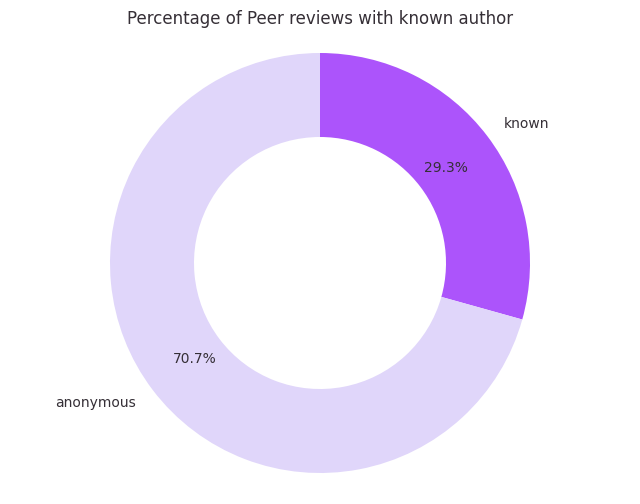

In [15]:
import matplotlib.pyplot as plt

# Step 3: Create a donut chart
labels = author_count_df['author'].tolist()
sizes = author_count_df['percentage'].tolist()
colors = ['#AC54FB', '#E0D6FA', '#D6C2E0']  # Use the original colors
explode = (0, 0)  # Do not explode any slices

plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    sizes, explode=explode, labels=labels, colors=colors,
    autopct='%1.1f%%', wedgeprops=dict(width=0.4), 
    pctdistance=0.75, startangle=90, counterclock=False# Move percentage closer to the center
)

# Customize the labels' color
for text in texts:
    text.set_color('#352f36')

# Customize the percentage text inside the donut
for autotext in autotexts:
    autotext.set_color('#352f36')

# Changing the title color
plt.title('Percentage of Peer reviews with known author', color='#352f36')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


## 1. Anonymus per venue

In [16]:
import pandas as pd

# Assuming all_info is your initial DataFrame
# Step 1: Drop duplicates based on 'citing_doi' while keeping the first occurrence
unique_citing = all_info_unique_citing

# Step 2: Group by 'cited_venue' to perform the counting
result = unique_citing.groupby('cited_venue')['author_info'].agg(
    anonymus=lambda x: (x == 'n/a').sum(),  # Count occurrences of empty strings
    known=lambda x: (x != 'n/a').sum()      # Count occurrences of non-empty strings
).reset_index()

# Step 3: Calculate total and percentage of known
result['total'] = result['anonymus'] + result['known']
result['percentage of known'] = (result['known'] / result['total']) * 100
result['percentage of unknown'] = 100 - result['percentage of known']  # Calculate percentage of unknown

# Add a final row for totals
total_row = pd.DataFrame({
    'cited_venue': ['Total'],
    'anonymus': [result['anonymus'].sum()],
    'known': [result['known'].sum()],
    'total': [result['total'].sum()],
    'percentage of known': [(result['known'].sum() / result['total'].sum()) * 100],
    'percentage of unknown': [100 - (result['known'].sum() / result['total'].sum()) * 100]  # Calculate total percentage of unknown
})

# Concatenate the total row to the result DataFrame
final_result = pd.concat([result, total_row], ignore_index=True)
# Sort the final_result by 'known' in descending order
final_result_sorted = final_result.sort_values(by='known', ascending=False)

final_result_sorted


,cited_venue,anonymus,known,total,percentage of known,percentage of unknown
579,Total,246240,102223,348463,29.335396,70.664604
577,eLife,7478,20846,28324,73.598362,26.401638
578,n/a,13500,12323,25823,47.721024,52.278976
442,PeerJ,22470,12198,34668,35.185185,64.814815
47,Atmospheric Chemistry and Physics,6008,6629,12637,52.457071,47.542929
...,...,...,...,...,...,...
450,Physical Review Letters,2,0,2,0.000000,100.000000
445,PeerJ Inorganic Chemistry,13,0,13,0.000000,100.000000
220,Greener Journal of Physics and Natural Sciences,1,0,1,0.000000,100.000000
221,"Group Dynamics: Theory, Research, and Practice",1,0,1,0.000000,100.000000


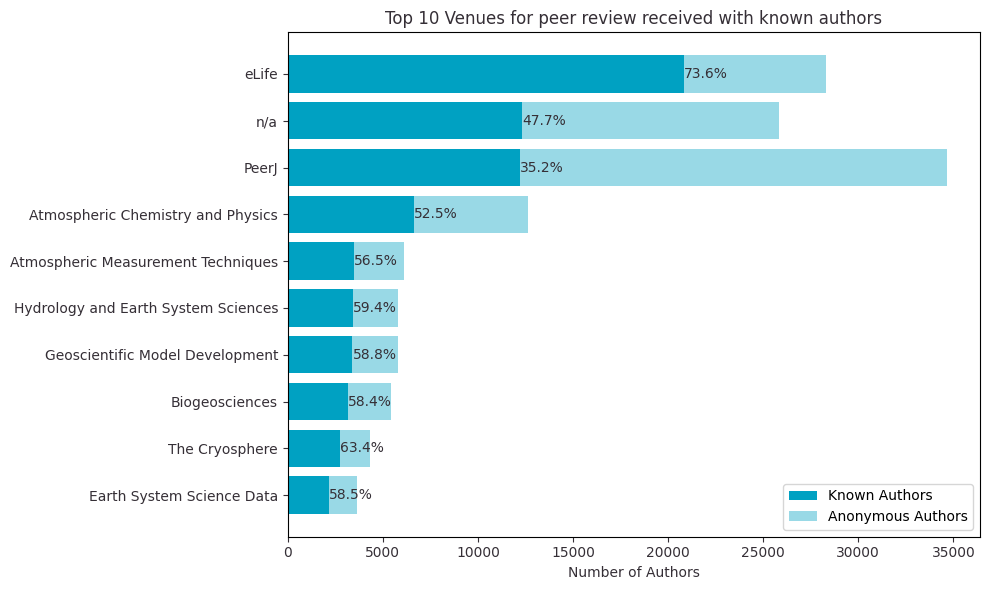

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming final_result_sorted is the DataFrame you already created

# Remove the total row
final_result_no_total = final_result_sorted[final_result_sorted['cited_venue'] != 'Total']

# Get the top 10 venues for known authors
top_known = final_result_no_total.nlargest(10, 'known')

# Calculate the percentage of known authors
top_known['percentage_of_known'] = (top_known['known'] / top_known['total']) * 100

# Creating a figure for the plot
plt.figure(figsize=(10, 6))

# Plotting the stacked bar chart
bars1 = plt.barh(top_known['cited_venue'], top_known['known'], color='#00A1C2', label='Known Authors')
bars2 = plt.barh(top_known['cited_venue'], top_known['anonymus'], left=top_known['known'], color='#99D9E6', label='Anonymous Authors')

# Adding percentage labels to the known authors
for bar, percentage in zip(bars1, top_known['percentage_of_known']):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, f'{percentage:.1f}%', 
             va='center', color='#352f36')

# Labels and Title
plt.xlabel('Number of Authors', color='#352f36')
plt.title('Top 10 Venues for peer review received with known authors', color='#352f36')
plt.tick_params(axis='x', colors='#352f36')
plt.tick_params(axis='y', colors='#352f36')

# Invert y-axis to show the highest count on top
plt.gca().invert_yaxis()  

# Adding a legend
plt.legend()

# Adjust layout to make sure everything fits without overlap
plt.tight_layout()

# Display the plot
plt.show()


## 2. Authors with orcid

In [18]:
# Step 1: Create a copy of all_info
new_authors_df = all_info_unique_citing.copy()

# Step 2: Calculate the number of doi (n_of_authors)
new_authors_df['n_of_authors'] = new_authors_df['author_info'].apply(
    lambda x: x.count(';') + 1 if isinstance(x, str) and x not in ['n/a', ''] else 0
)

# Step 3: Calculate the number of authors with ORCID (authors_with_orcid)
new_authors_df['authors_with_orcid'] = new_authors_df['author_info'].apply(
    lambda x: x.count('ORCID') if isinstance(x, str) and x != 'n/a' else 0
)



In [19]:
new_authors_df

,oci,citing_doi,cited_doi,citing_date,citing_url,cited_url,cited_issn,cited_venue,cited_date,prov_agent,source,prov_date,time_span,author_info,n_of_authors,authors_with_orcid
0,oci:020070505043614211815143702090604083700010...,10.7554/elife.29648.014,10.7554/elife.29648,2017-10-20,http://dx.doi.org/10.7554/elife.29648.014,http://dx.doi.org/10.7554/elife.29648,2050-084X,eLife,2017-09-11,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P1M9D,n/a,0,0
1,oci:020070505043614211815143702090604083700010...,10.7554/elife.29648.015,10.7554/elife.29648,2017-10-20,http://dx.doi.org/10.7554/elife.29648.015,http://dx.doi.org/10.7554/elife.29648,2050-084X,eLife,2017-09-11,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P1M9D,"Jagadisan, Uday K (ORCID: http://orcid.org/000...",2,2
2,oci:020070505043614211815143702020509093700030...,10.7554/elife.22599.030,10.7554/elife.22599,2017-10-30,http://dx.doi.org/10.7554/elife.22599.030,http://dx.doi.org/10.7554/elife.22599,2050-084X,eLife,2017-09-11,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P1M19D,n/a,0,0
3,oci:020070505043614211815143702020509093700030...,10.7554/elife.22599.031,10.7554/elife.22599,2017-10-30,http://dx.doi.org/10.7554/elife.22599.031,http://dx.doi.org/10.7554/elife.22599,2050-084X,eLife,2017-09-11,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P1M19D,"Najor, Nicole Ann (ORCID: http://orcid.org/000...",7,3
4,oci:020070505043614211815143702060905023700020...,10.7554/elife.26952.025,10.7554/elife.26952,2017-09-26,http://dx.doi.org/10.7554/elife.26952.025,http://dx.doi.org/10.7554/elife.26952,2050-084X,eLife,2017-09-11,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P15D,"Borch Jensen, Martin (ORCID: http://orcid.org/...",5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361112,oci:020050109043628146302000201630105036327120...,10.5194/se-2021-153-rc2,10.5194/se-13-1027-2022,2022-03-10,http://dx.doi.org/10.5194/se-2021-153-rc2,http://dx.doi.org/10.5194/se-13-1027-2022,1869-9529,Solid Earth,2022-06-22,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,-P3M12D,n/a,0,0
361113,oci:020050109043628146302000201630105036327120...,10.5194/se-2021-153-rc1,10.5194/se-13-1027-2022,2022-03-01,http://dx.doi.org/10.5194/se-2021-153-rc1,http://dx.doi.org/10.5194/se-13-1027-2022,1869-9529,Solid Earth,2022-06-22,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,-P3M21D,"Peel, Frank",1,0
361114,oci:020070505043614211815143707040501093728100...,10.7554/elife.74519.sa2,10.7554/elife.74519,2022-06-22,http://dx.doi.org/10.7554/elife.74519.sa2,http://dx.doi.org/10.7554/elife.74519,2050-084X,eLife,2022-06-22,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P0D,"Zou, Yan; Zhang, Miaomiao; Wu, Qiongfeng; Zhao...",8,1
361115,oci:020070505043614211815143707040501093728100...,10.7554/elife.74519.sa1,10.7554/elife.74519,2022-06-22,http://dx.doi.org/10.7554/elife.74519.sa1,http://dx.doi.org/10.7554/elife.74519,2050-084X,eLife,2022-06-22,https://academictorrents.com/details/d9e554f4f...,https://doi.org/10.13003/8wx5k,2024-05-23T10:49:53+0000,P0D,"Martinac, Boris (ORCID: http://orcid.org/0000-...",1,1


In [20]:
# Count occurrences of values in n_of_authors
n_of_authors_count = new_authors_df['n_of_authors'].value_counts().reset_index()
n_of_authors_count.columns = ['n_of_authors', 'count']


In [21]:
# Calculate the mean of n_of_authors
mean_n_of_authors = new_authors_df['n_of_authors'].mean()
std_n_of_authors = new_authors_df['n_of_authors'].std()
medianan_n_of_authors = new_authors_df['n_of_authors'].median()

# Print the sorted DataFrame and the mean

print(f"\nMean of n_of_authors: {mean_n_of_authors:.2f}")
print(f"Standard Deviation of n_of_authors: {std_n_of_authors:.2f}")
print(f"Median of n_of_authors: {medianan_n_of_authors:.2f}")

# Display the resulting DataFrames
print("Occurrences of n_of_authors:")
n_of_authors_count.sort_values(by='n_of_authors', ascending=True)

n_of_authors_count_sorted  = n_of_authors_count.sort_values(by='n_of_authors', ascending=True)
n_of_authors_count_sorted


Mean of n_of_authors: 0.68
Standard Deviation of n_of_authors: 4.39
Median of n_of_authors: 0.00
Occurrences of n_of_authors:


,n_of_authors,count
0,0,246240
1,1,81012
2,2,3454
3,3,2349
4,4,2164
...,...,...
59,158,1
63,159,1
61,473,1
70,1382,1


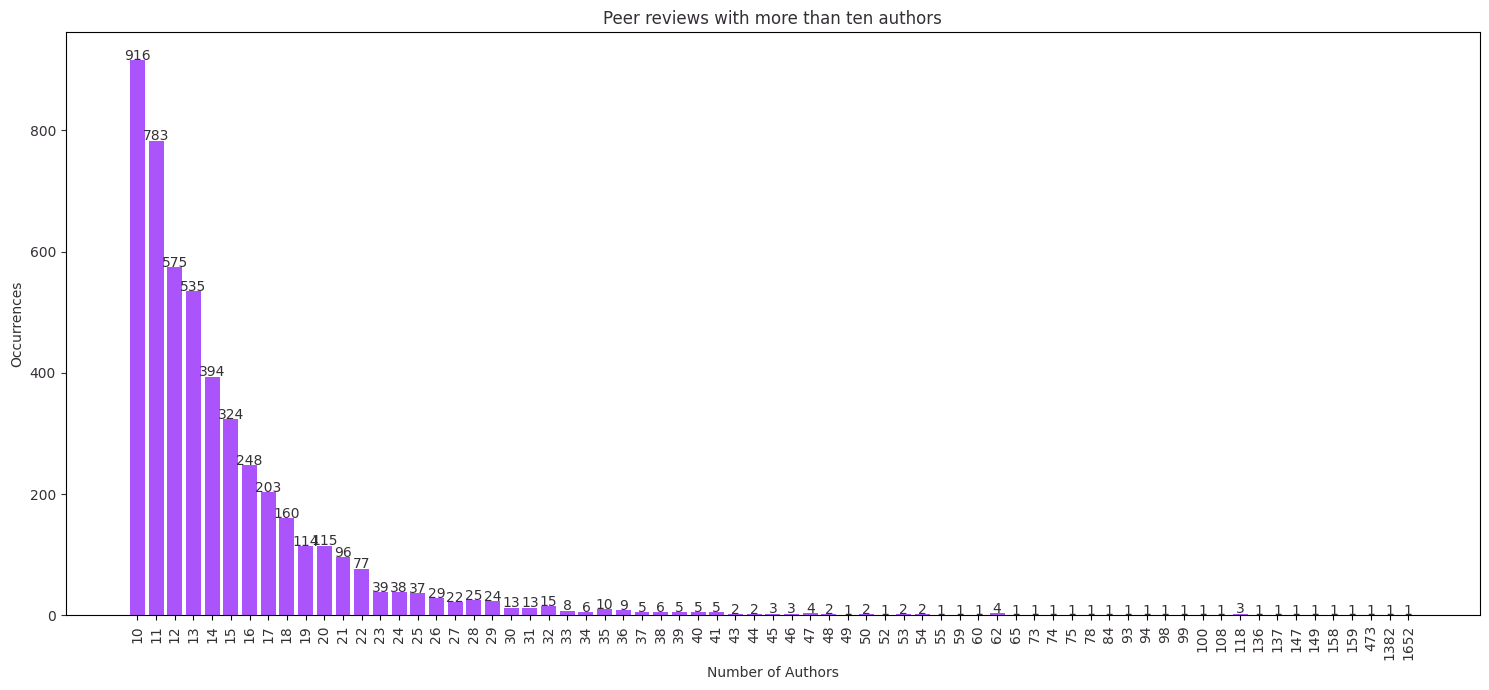

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming n_of_authors_count is already defined
# Filter for n_of_authors >= 10
filtered_n_of_authors = n_of_authors_count[n_of_authors_count['n_of_authors'] >= 10]

# Sort the filtered DataFrame in ascending order by n_of_authors
filtered_n_of_authors = filtered_n_of_authors.sort_values(by='n_of_authors')

# Create a bar plot for occurrences of n_of_authors
plt.figure(figsize=(15, 7))
plt.bar(filtered_n_of_authors['n_of_authors'].astype(str), filtered_n_of_authors['count'], color='#AC54FB')

# Add labels and title
plt.xlabel('Number of Authors', color='#352f36')
plt.ylabel('Occurrences', color='#352f36')
plt.title('Peer reviews with more than ten authors', color='#352f36')

# Add percentage labels on the bars
for i, count in enumerate(filtered_n_of_authors['count']):
    plt.text(i, count + 0.5, str(count), ha='center', color='#352f36')

# Customize tick colors and rotate x-axis labels
plt.xticks(rotation=90, color='#352f36')
plt.tick_params(axis='y', colors='#352f36')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [40]:
import pandas as pd



# Create bins based on powers of 10
bins = [1, 2, 5, 10, 20, 10000]  # Modify as needed for larger ranges

# Create a column for binning based on powers of 10
n_of_authors_count['bin'] = pd.cut(n_of_authors_count['n_of_authors'], bins=bins, right=False)

# Group by the bins and calculate the number of counts in each bin
bin_counts = n_of_authors_count.groupby('bin')['count'].sum().reset_index()

# Calculate the total number of counts
total_count = n_of_authors_count['count'].sum()

# Add a percentage column
bin_counts['percentage'] = (bin_counts['count'] / total_count) * 100

bin_counts


C:\Users\danie\AppData\Local\Temp\ipykernel_31060\2609355699.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = n_of_authors_count.groupby('bin')['count'].sum().reset_index()


,bin,count,percentage
0,"[1, 2)",81012,23.248379
1,"[2, 5)",7967,2.286326
2,"[5, 10)",8335,2.391933
3,"[10, 20)",4252,1.220216
4,"[20, 10000)",657,0.188542


In [43]:
# Create bins based on powers of 10
bins = [10, 20, 100, 10000]  # Modify as needed for larger ranges

# Create a column for binning based on powers of 10
n_of_authors_count['bin'] = pd.cut(n_of_authors_count['n_of_authors'], bins=bins, right=False)

# Group by the bins and calculate the number of counts in each bin
bin_counts = n_of_authors_count.groupby('bin')['count'].sum().reset_index()

# Calculate the sum of counts for each bin
bin_sums = n_of_authors_count.groupby('bin')['count'].transform('sum')

# Add a percentage column based on each bin's sum
n_of_authors_count['percentage_per_bin'] = (n_of_authors_count['count'] / bin_sums) * 100

# You can then group again to get the percentage in each bin
bin_counts['percentage'] = (bin_counts['count'] / bin_counts['count'].sum()) * 100

bin_counts


C:\Users\danie\AppData\Local\Temp\ipykernel_31060\1429722710.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = n_of_authors_count.groupby('bin')['count'].sum().reset_index()
C:\Users\danie\AppData\Local\Temp\ipykernel_31060\1429722710.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_sums = n_of_authors_count.groupby('bin')['count'].transform('sum')


,bin,count,percentage
0,"[10, 20)",4252,86.616419
1,"[20, 100)",643,13.098391
2,"[100, 10000)",14,0.285190


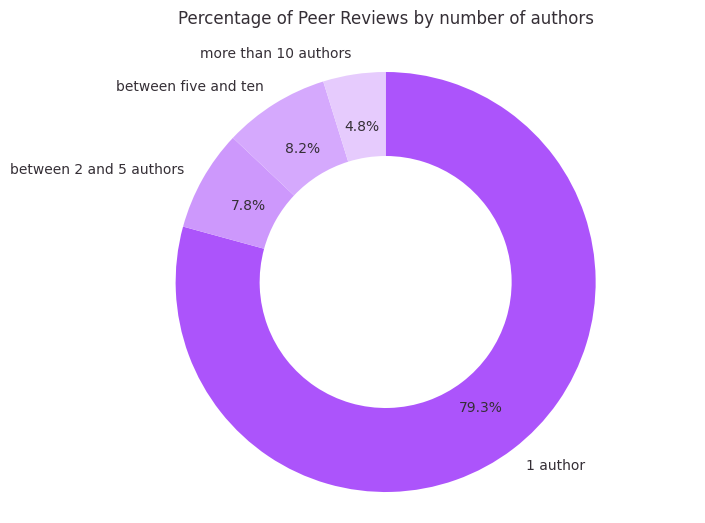

In [37]:
# Update labels
labels = ['1 author', 'between 2 and 5 authors', 'between five and ten', 'more than 10 authors']

# Sizes for the pie chart
sizes = bin_counts['percentage'].tolist()
colors = ['#AC54FB', '#CD98FC', '#D5A9FD','#E6CBFD', '#E0D6FA']

# Create an explode array for each slice
# explode = [0, 0, 0, 0, 0.1]  # Adjust as necessary to explode specific slices

plt.figure(figsize=(8, 6))

wedges, texts, autotexts = plt.pie(
    sizes, labels=labels, colors=colors,
    autopct='%1.1f%%', wedgeprops=dict(width=0.4), 
    pctdistance=0.75, startangle=90, counterclock=False
)

# Customize the labels' color
for text in texts:
    text.set_color('#352f36')

# Customize the percentage text inside the donut
for autotext in autotexts:
    autotext.set_color('#352f36')

# Changing the title color with added space
plt.title('Percentage of Peer Reviews by number of authors', color='#352f36', pad=20)  # Increase pad value to add more space

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [25]:
# Filter the rows where 'n_of_authors' is greater than or equal to 100
filtered_authors_df = new_authors_df[new_authors_df['n_of_authors'] >= 100]

# Limit the columns to only 'citing_doi' and 'n_of_authors'
filtered_authors_df = filtered_authors_df[['citing_doi', 'n_of_authors']]

# Display the filtered DataFrame
filtered_authors_df
# Sort the DataFrame by 'n_of_authors' in ascending order
filtered_authors_df = filtered_authors_df.sort_values(by='n_of_authors', ascending=False)
filtered_authors_df


,citing_doi,n_of_authors
331812,10.1111/irv.13039/v2/response1,1652
125839,10.7554/elife.60060.sa2,1382
331621,10.1111/dom.14857/v2/response1,473
183287,10.7554/elife.60675.sa2,159
176802,10.7554/elife.59391.sa2,158
138437,10.7554/elife.67569.sa2,149
98290,10.7554/elife.66877.sa2,147
174429,10.7554/elife.58728.sa2,137
139240,10.7554/elife.66537.sa2,136
138809,10.1002/2688-8319.12032/v2/response1,118


In [26]:
sub_sorted_by_authors_df = sorted_by_authors_df.loc[:, ['citing_url', 'author_info', 'n_of_authors']][:10]
sub_sorted_by_authors_df

NameError: name 'sorted_by_authors_df' is not defined

### ORCID

In [606]:
# Count occurrences of values in authors_with_orcid
authors_with_orcid_count = new_authors_df['authors_with_orcid'].value_counts().reset_index()
authors_with_orcid_count.columns = ['authors_with_orcid', 'count']

In [602]:
print("Occurrences of authors_with_orcid:")
authors_with_orcid_count.sort_values(by='authors_with_orcid', ascending=True)

Occurrences of authors_with_orcid:


,authors_with_orcid,count
0,0,334128
1,1,7626
2,2,2371
3,3,1651
4,4,1096
5,5,658
6,6,401
7,7,201
8,8,109
9,9,63


In [603]:
# Step 1: Create a copy of all_info and drop duplicates based on 'citing_doi'
unique_citing_doi_df = all_info.drop_duplicates(subset='citing_doi').copy()

# Step 2: Calculate the number of authors (n_of_authors)
unique_citing_doi_df['n_of_authors'] = unique_citing_doi_df['author_info'].apply(lambda x: x.count(';') + 1 if isinstance(x, str) and x else 0)

# Sort by n_of_authors in ascending order
sorted_by_authors_df = unique_citing_doi_df.sort_values(by='n_of_authors', ascending=False)

# Step 3: Calculate the number of authors with ORCID (authors_with_orcid)
unique_citing_doi_df['authors_with_orcid'] = unique_citing_doi_df['author_info'].apply(lambda x: x.count('(') if isinstance(x, str) else 0)

# Sort by authors_with_orcid in ascending order
sorted_by_orcid_df = unique_citing_doi_df.sort_values(by='authors_with_orcid', ascending=False)

# Step 4: Count occurrences of values in n_of_authors
n_of_authors_count_unique = unique_citing_doi_df['n_of_authors'].value_counts().reset_index()
n_of_authors_count_unique.columns = ['n_of_authors', 'count']

# Step 5: Count occurrences of values in authors_with_orcid
authors_with_orcid_count_unique = unique_citing_doi_df['authors_with_orcid'].value_counts().reset_index()
authors_with_orcid_count_unique.columns = ['authors_with_orcid', 'count']



In [19]:
def primo(n):
    if n == 2:
        print('N è primo')
    else:
        i = 2
        for a in range(i,n):
            if n%a == 0:
                print('N non è primo')
                return
        print('N è primo')
        return
                

primo(24)


N non è primo
